In [1]:
import pandas as pd
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
import math
from scipy import stats

In [2]:
Prescribed_Behavior = pd.read_csv('human_survey_data/Prescribed_Behavior_Human_Survey.csv')
Parameterized_Learning_Agent = pd.read_csv('human_survey_data/Parameterized_Learning_Agent_Human_Survey.csv')
Single_Agent_Raw_Act = pd.read_csv('human_survey_data/Single_Agent_Raw_Act_Human_Survey.csv')
Agent_Community_Raw_Act = pd.read_csv('human_survey_data/Agent_Community_Raw_Act_Human_Survey.csv')

In [3]:
print('Participants for Prescribed_Behavior: {}'.format(len(Prescribed_Behavior)))
print('Participants for Parameterized_Learning_Agent: {}'.format(len(Parameterized_Learning_Agent)))
print('Participants for Single_Agent_Raw_Act: {}'.format(len(Single_Agent_Raw_Act)))
print('Participants for Agent_Community_Raw_Act: {}'.format(len(Agent_Community_Raw_Act)))

Participants for Prescribed_Behavior: 14
Participants for Parameterized_Learning_Agent: 15
Participants for Single_Agent_Raw_Act: 4
Participants for Agent_Community_Raw_Act: 3


In [4]:
Prescribed_Behavior.columns

Index(['Timestamp', 'Research Code:', 'Interests and Background',
       'How familiar are you with interactive architecture? (1. No prior knowledge 5. I am an expert.)',
       'How familiar are you with machine learning algorithms? (1. I've never heard of it 5. I'm an expert in Machine Learning.)',
       'Living Architecture System - Animacy (1. Fake 5. Natural)',
       'Living Architecture System - Animacy (1. Machinelike 5. Humanlike)',
       'Living Architecture System - Animacy (1. Unconscious 5. Conscious)',
       'Living Architecture System - Animacy (1. Artificial 5. Lifelike)',
       'Living Architecture System - Animacy (1. Moving rigidly 5. Moving elegantly)',
       'Living Architecture System - Animacy (1. Dead 5. Alive)',
       'Living Architecture System - Animacy (1. Stagnant 5. Lively)',
       'Living Architecture System - Animacy (1. Mechanical 5. Organic)',
       'Living Architecture System - Animacy (1. Artificial 5. Lifelike).1',
       'Living Architectur

### Plot Godspeed Questionnaire 
(https://link.springer.com/content/pdf/10.1007%2Fs12369-008-0001-3.pdf)

**Anthropomorphism** (Please rate your imporession of the robot on these scalses:)
1. (1. Fake 5. Natural)
2. (1. Machinelike 5. Humanlike)
3. (1. Unconscious 5. Conscious)
4. (1. Artificial 5. Lifelike)
5. (1. Moving rigidly 5. Moving elegantly)

**Animacy**
6. (1. Dead 5. Alive)
7. (1. Stagnant 5. Lively)
8. (1. Mechanical 5. Organic)
9. (1. Artificial 5. Lifelike)
10. (1. Inert 5. Interactive)
11. (1. Apathetic 5. Responsive)

**Likeability**
12. (1. Dislike 5. Like)
13. (1. Unfriendly 5. Friendly)
14. (1. Unkind 5. Kind)
15. (1. Unpleasant 5. Pleasant)
16. (1. Awful 5. Nice)

**Perceived Intelligence**
17. (1. Incompetent 5. Competent)
18. (1. Ignorant 5. Knowledgeable)
19. (1. Irresponsible 5. Responsible)
20. (1. Unintelligent 5. Intelligent)
21. (1. Foolish 5. Sensible)

**Perceived Safety** (Please rate your emotional state on these scales:)
22. Anxious    1 2 3 4 5  Relaxed
23. Agitated   1 2 3 4 5  Calm
24. Quiescent  1 2 3 4 5  Surprised

### Count

c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


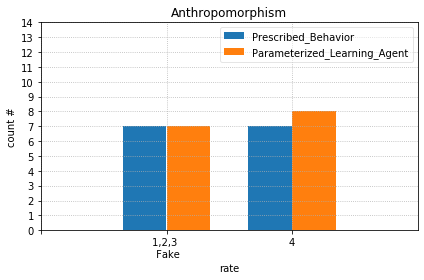

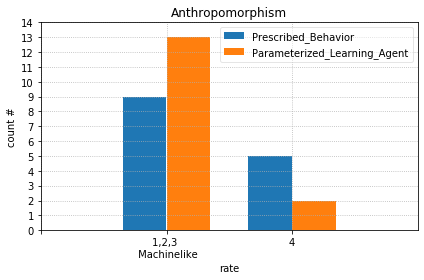

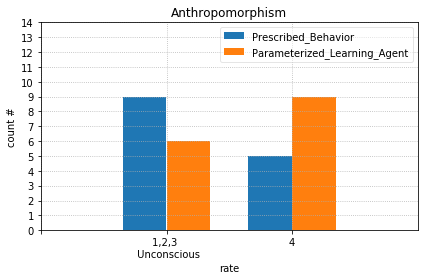

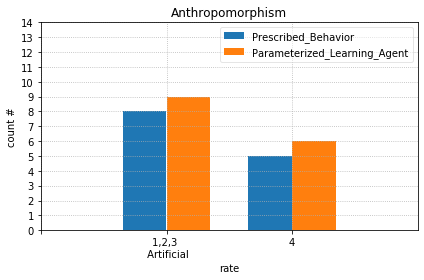

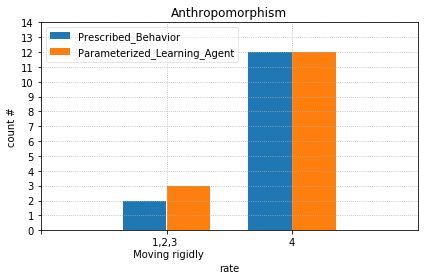

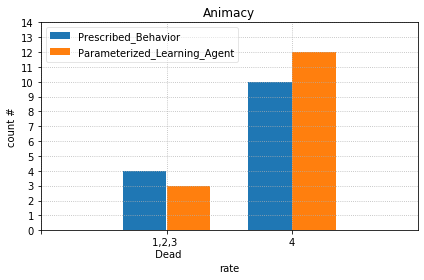

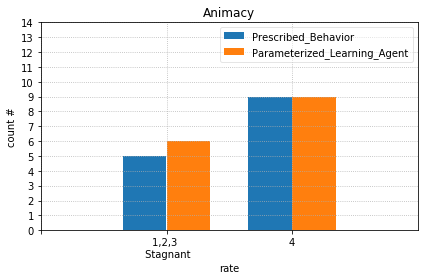

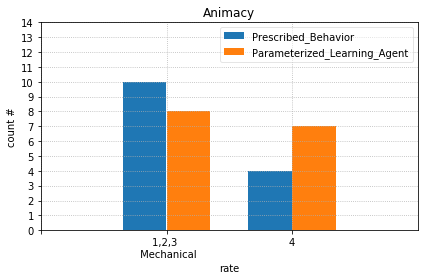

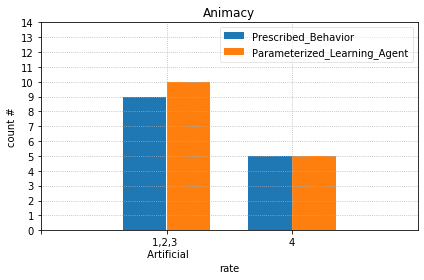

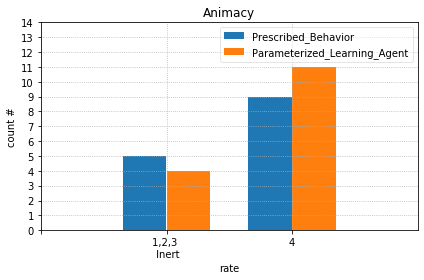

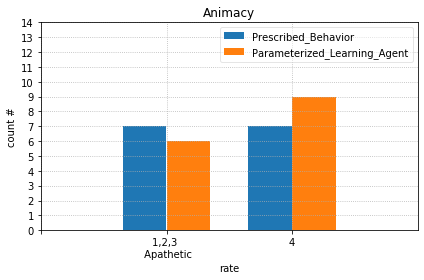

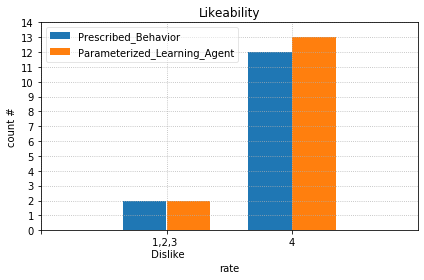

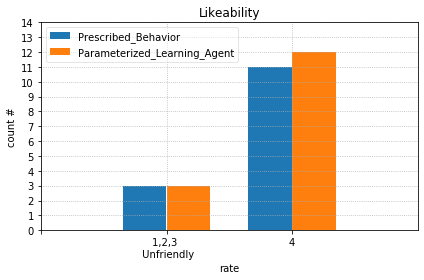

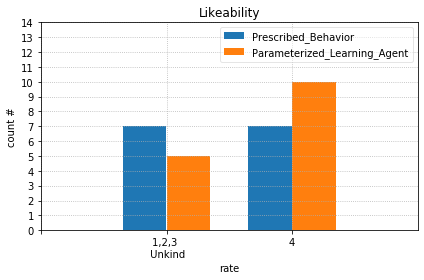

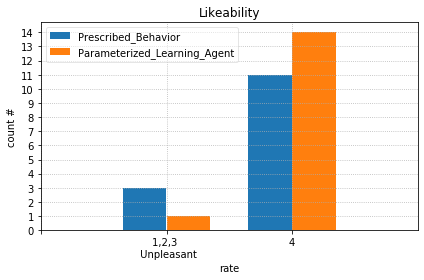

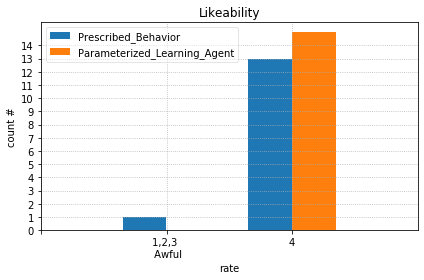

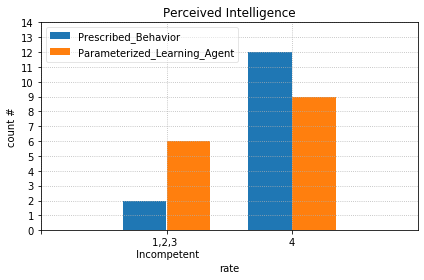

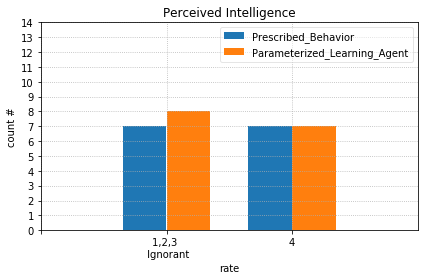

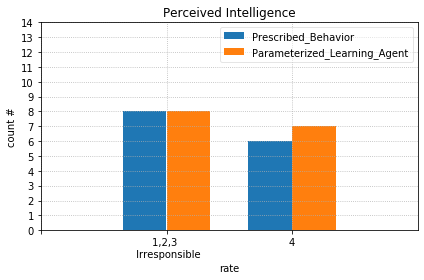

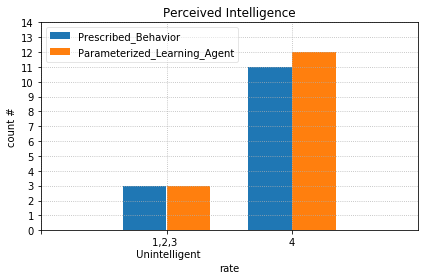

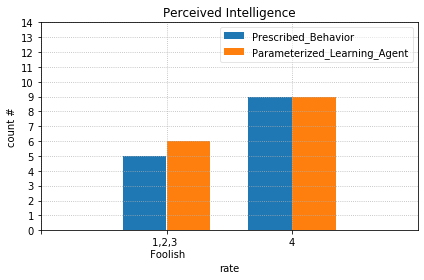

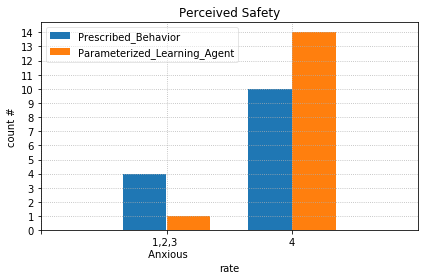

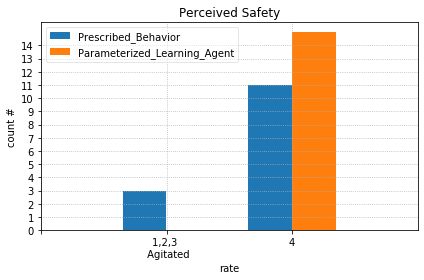

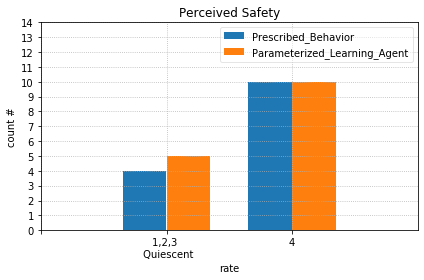

In [5]:
titles = ['Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism',
          'Animacy','Animacy','Animacy','Animacy','Animacy','Animacy',
          'Likeability','Likeability', 'Likeability', 'Likeability', 'Likeability',  
          'Perceived Intelligence','Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 
          'Perceived Safety','Perceived Safety','Perceived Safety']
Q_start_index = 5
Q_end_index = 29

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    combine_first_n = 3
    # baseline
    PB_scale_count = []
    for scale in range(1,6):
        PB_scale_count.append((Prescribed_Behavior[Prescribed_Behavior.columns[column_index]] == scale).sum())
    
    PB_scale_count_combined = [np.sum(PB_scale_count[:combine_first_n])] + [np.sum(PB_scale_count[combine_first_n:])]
    
    # parameterized learning agent
    PLA_scale_count = []
    for scale in range(1,6):
        PLA_scale_count.append((Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]] == scale).sum())
    
    PLA_scale_count_combined = [np.sum(PLA_scale_count[:combine_first_n])] + [np.sum(PLA_scale_count[combine_first_n:])]
    
    # plot bar chart
    plt.figure()
    width=0.35
    
    plt.bar(np.arange(1,len(PB_scale_count_combined)+1)-width/2, PB_scale_count_combined, width=width)
    plt.bar(np.arange(1,len(PLA_scale_count_combined)+1)+width/2, PLA_scale_count_combined, width=width)
    
    plt.legend(('Prescribed_Behavior', 'Parameterized_Learning_Agent'),
               framealpha=0.5)
    plt.xlabel('rate')
    plt.xlim(0, len(PB_scale_count_combined)+1, 1)
    plt.xticks(np.arange(0, len(PB_scale_count_combined)+1, 1), ('', '1,2,3 \n{}'.format(low_rate), '4', '5 \n{}'.format(high_rate), ''))
    
    plt.ylabel('count #')
    plt.yticks(np.arange(0,15,1))
    
    plt.title(titles[column_index-Q_start_index])
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    

In [6]:
titles[column_index-Q_start_index].split(' ')[0]

'Perceived'

c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

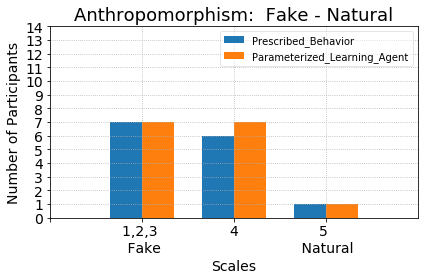

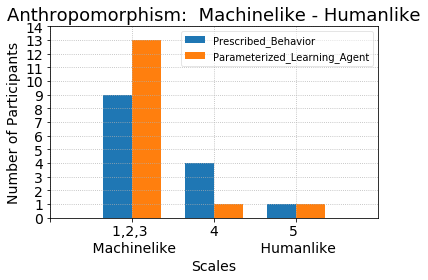

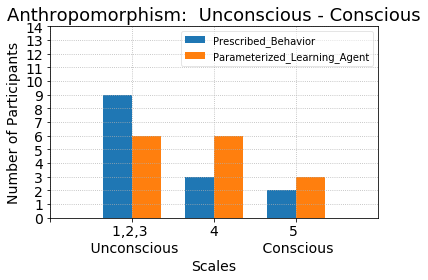

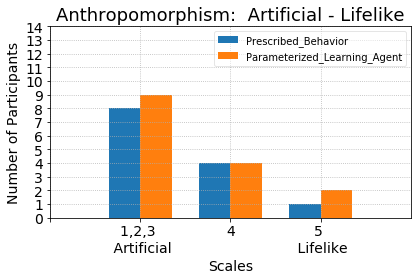

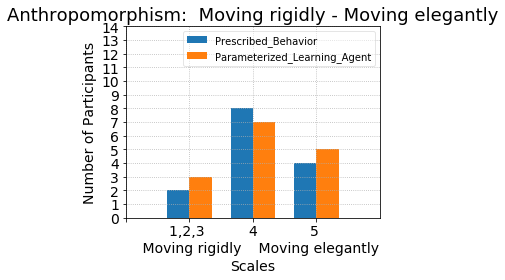

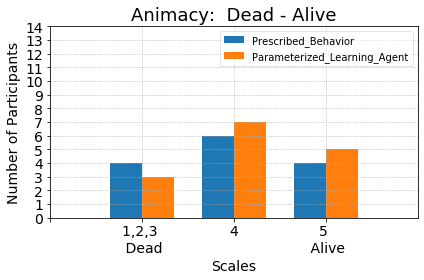

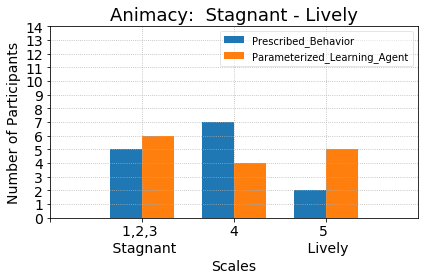

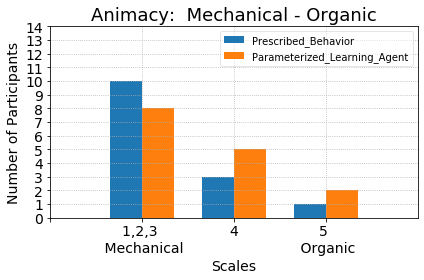

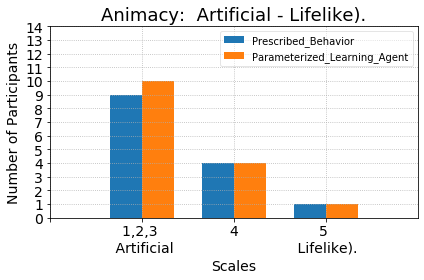

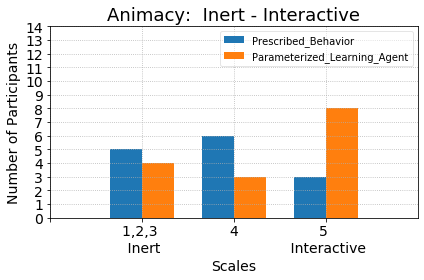

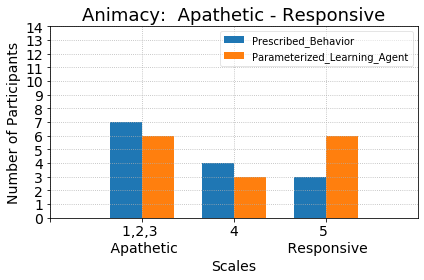

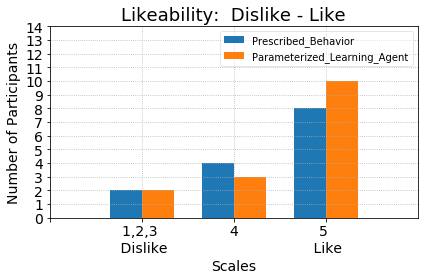

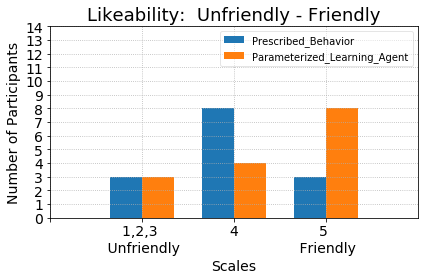

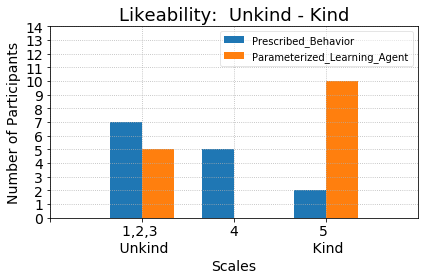

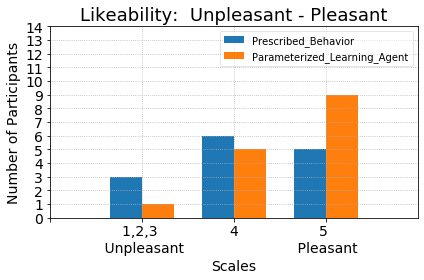

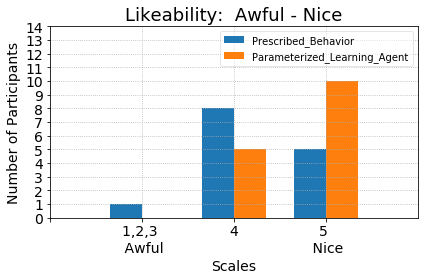

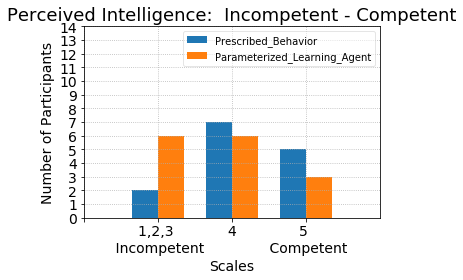

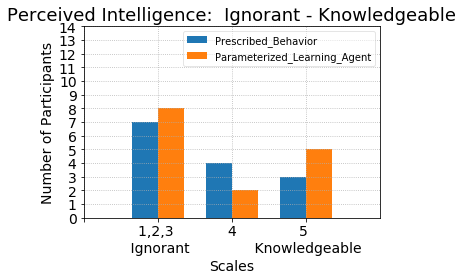

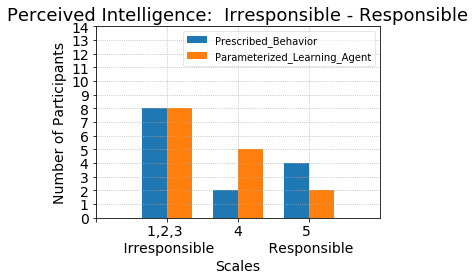

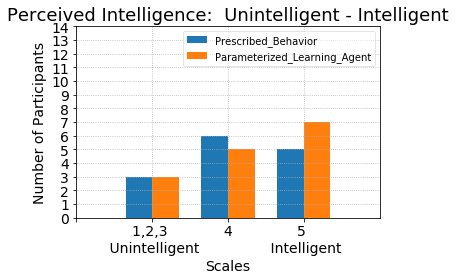

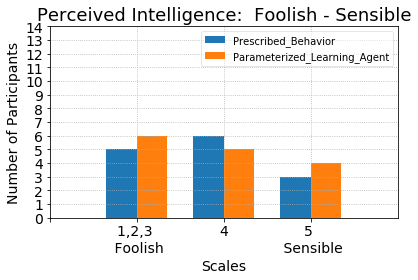

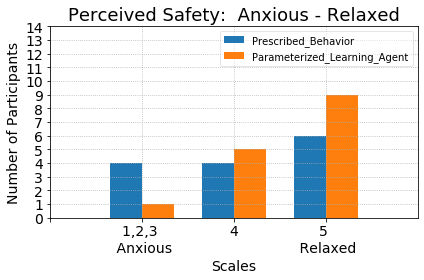

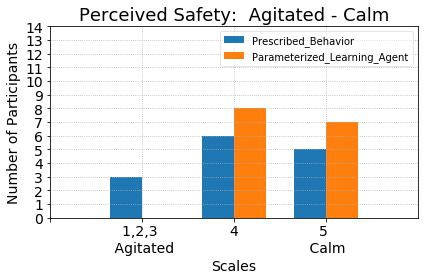

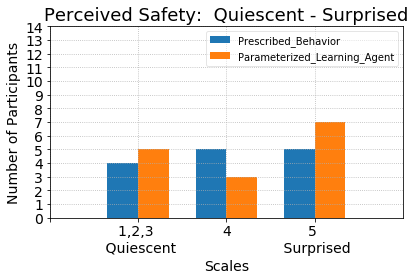

In [7]:
titles = ['Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism',
          'Animacy','Animacy','Animacy','Animacy','Animacy','Animacy',
          'Likeability','Likeability', 'Likeability', 'Likeability', 'Likeability',  
          'Perceived Intelligence','Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 
          'Perceived Safety','Perceived Safety','Perceived Safety']
Q_start_index = 5
Q_end_index = 29

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    combine_first_n = 3
    # baseline
    PB_scale_count = []
    for scale in range(1,6):
        PB_scale_count.append((Prescribed_Behavior[Prescribed_Behavior.columns[column_index]] == scale).sum())
    
    PB_scale_count_combined = [np.sum(PB_scale_count[:combine_first_n])] + PB_scale_count[combine_first_n:]
    
    # parameterized learning agent
    PLA_scale_count = []
    for scale in range(1,6):
        PLA_scale_count.append((Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]] == scale).sum())
    
    PLA_scale_count_combined = [np.sum(PLA_scale_count[:combine_first_n])] + PLA_scale_count[combine_first_n:]
    
#     chi2, p, dof, expected = chi2_contingency([PB_scale_count_combined, PLA_scale_count_combined])
#     print('{}: {}-{}'.format(titles[column_index-Q_start_index], low_rate, high_rate))
#     print('\tchi2={:.4f},\n \tp={:.4f},\n \tdof={}'.format(chi2, p, dof))
    
    # plot bar chart
    plt.figure()
    width=0.35
    
    plt.bar(np.arange(1,len(PB_scale_count_combined)+1)-width/2, PB_scale_count_combined, width=width)
    plt.bar(np.arange(1,len(PLA_scale_count_combined)+1)+width/2, PLA_scale_count_combined, width=width)
    
    plt.legend(('Prescribed_Behavior', 'Parameterized_Learning_Agent'),
               framealpha=0.5)
    plt.xlabel('Scales', fontsize=14)
    plt.xlim(0, len(PB_scale_count_combined)+1, 1)
    plt.xticks(np.arange(0, len(PB_scale_count_combined)+1, 1), ('', '1,2,3 \n{}'.format(low_rate), '4', '5 \n{}'.format(high_rate), ''), 
               fontsize=14)
    
    plt.ylabel('Number of Participants', fontsize=14)
    plt.yticks(np.arange(0,15,1), fontsize=14)
    
    plt.title('{}: {} -{}'.format(titles[column_index-Q_start_index], low_rate, high_rate), fontsize=18)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    if len(titles[column_index-Q_start_index].split(' '))== 2:
        plt.savefig('./figures/GodspeedHist/{}_{}_{}_{}.pdf'.format(titles[column_index-Q_start_index].split(' ')[0],
                                                                 titles[column_index-Q_start_index].split(' ')[1],
                                                                 low_rate.split(' ')[1],
                                                                 high_rate.split(' ')[1]), dpi=300)
    else:
        plt.savefig('./figures/GodspeedHist/{}_{}_{}.pdf'.format(titles[column_index-Q_start_index],
                                                                 low_rate.split(' ')[1],
                                                                 high_rate.split(' ')[1]), dpi=300)

c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

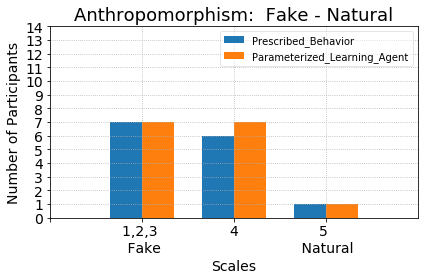

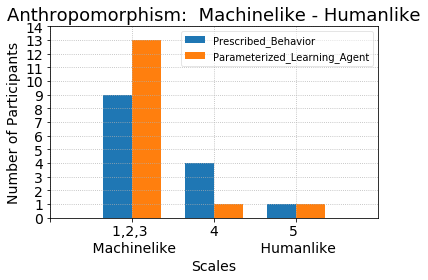

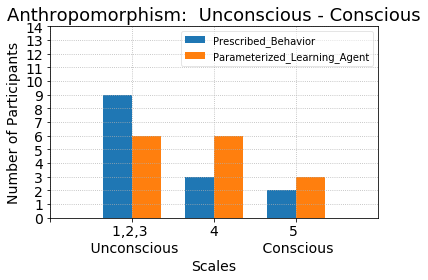

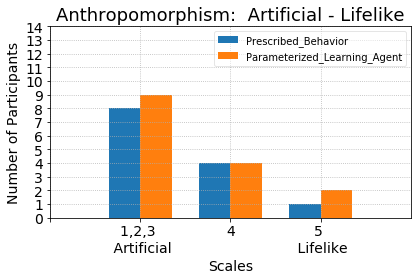

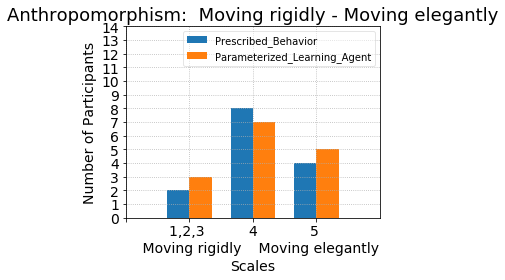

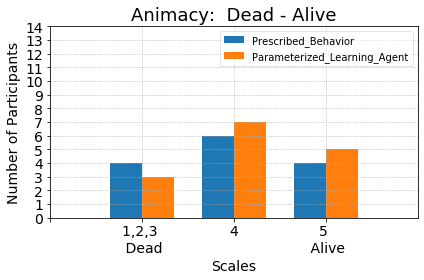

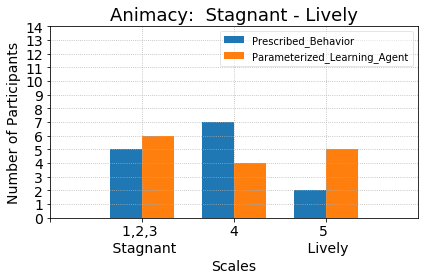

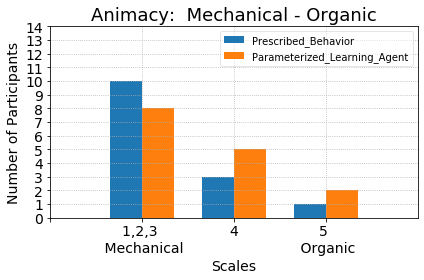

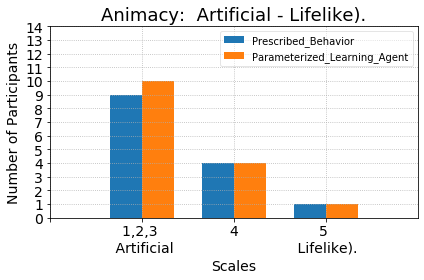

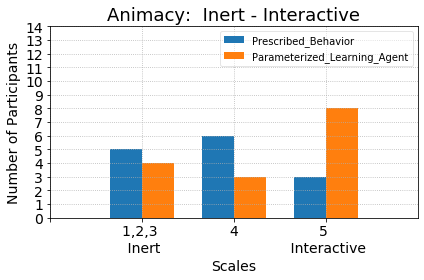

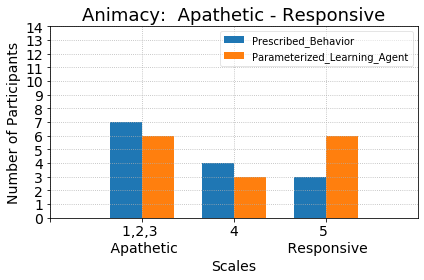

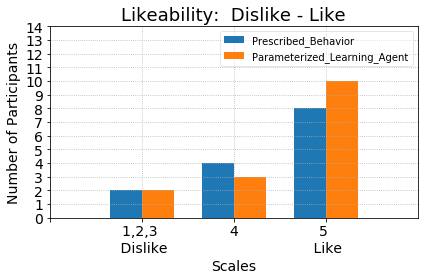

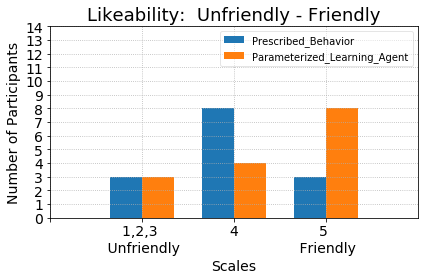

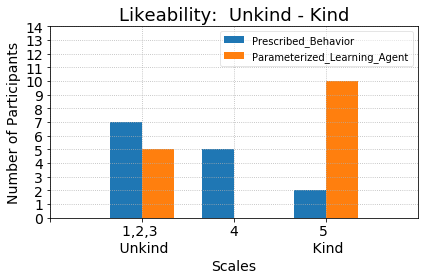

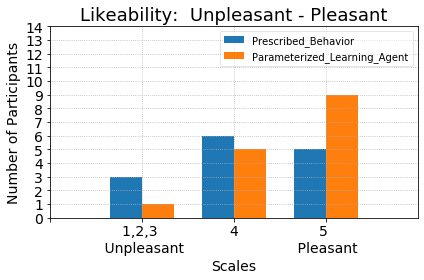

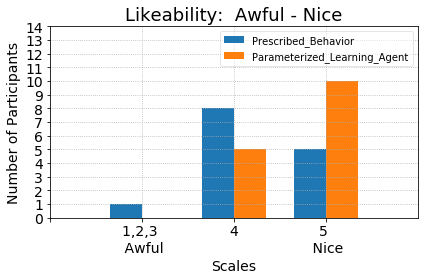

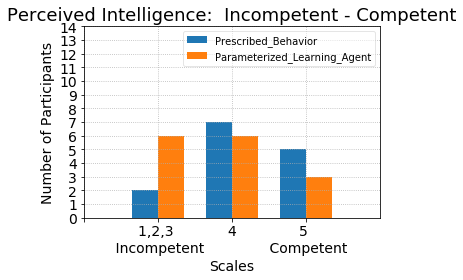

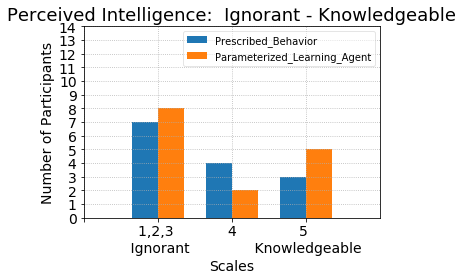

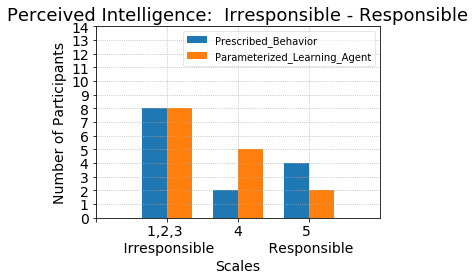

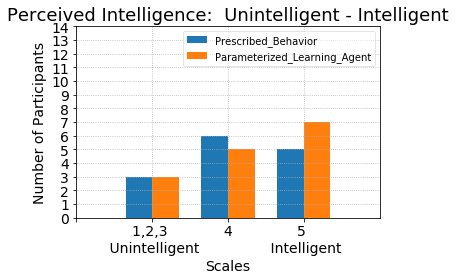

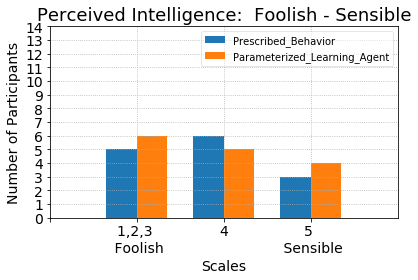

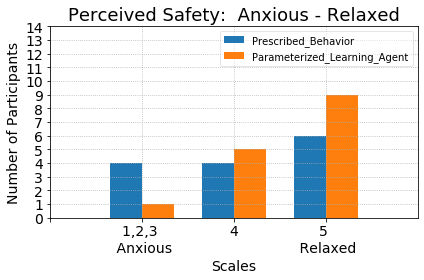

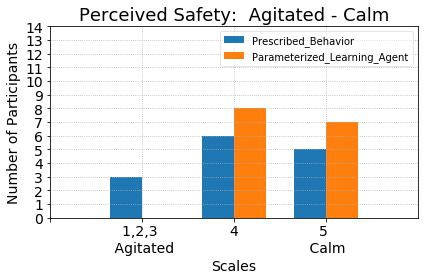

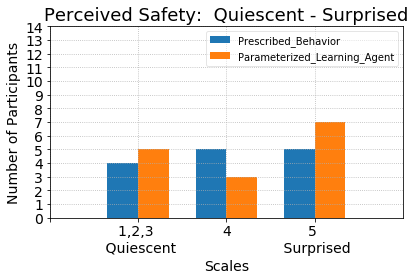

In [8]:
titles = ['Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism',
          'Animacy','Animacy','Animacy','Animacy','Animacy','Animacy',
          'Likeability','Likeability', 'Likeability', 'Likeability', 'Likeability',  
          'Perceived Intelligence','Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 
          'Perceived Safety','Perceived Safety','Perceived Safety']
Q_start_index = 5
Q_end_index = 29

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    combine_first_n = 3
    # baseline
    PB_scale_count = []
    for scale in range(1,6):
        PB_scale_count.append((Prescribed_Behavior[Prescribed_Behavior.columns[column_index]] == scale).sum())
    
    PB_scale_count_combined = [np.sum(PB_scale_count[:combine_first_n])] + PB_scale_count[combine_first_n:]
    
    # parameterized learning agent
    PLA_scale_count = []
    for scale in range(1,6):
        PLA_scale_count.append((Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]] == scale).sum())
    
    PLA_scale_count_combined = [np.sum(PLA_scale_count[:combine_first_n])] + PLA_scale_count[combine_first_n:]
    
#     chi2, p, dof, expected = chi2_contingency([PB_scale_count_combined, PLA_scale_count_combined])
#     print('{}: {}-{}'.format(titles[column_index-Q_start_index], low_rate, high_rate))
#     print('\tchi2={:.4f},\n \tp={:.4f},\n \tdof={}'.format(chi2, p, dof))
    
    # plot bar chart
    plt.figure()
    width=0.35
    
    plt.bar(np.arange(1,len(PB_scale_count_combined)+1)-width/2, PB_scale_count_combined, width=width)
    plt.bar(np.arange(1,len(PLA_scale_count_combined)+1)+width/2, PLA_scale_count_combined, width=width)
    
    plt.legend(('Prescribed_Behavior', 'Parameterized_Learning_Agent'),
               framealpha=0.5)
    plt.xlabel('Scales', fontsize=14)
    plt.xlim(0, len(PB_scale_count_combined)+1, 1)
    plt.xticks(np.arange(0, len(PB_scale_count_combined)+1, 1), ('', '1,2,3 \n{}'.format(low_rate), '4', '5 \n{}'.format(high_rate), ''), 
               fontsize=14)
    
    plt.ylabel('Number of Participants', fontsize=14)
    plt.yticks(np.arange(0,15,1), fontsize=14)
    
    plt.title('{}: {} -{}'.format(titles[column_index-Q_start_index], low_rate, high_rate), fontsize=18)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    if len(titles[column_index-Q_start_index].split(' '))== 2:
        plt.savefig('./figures/GodspeedHist/{}_{}_{}_{}.pdf'.format(titles[column_index-Q_start_index].split(' ')[0],
                                                                 titles[column_index-Q_start_index].split(' ')[1],
                                                                 low_rate.split(' ')[1],
                                                                 high_rate.split(' ')[1]), dpi=300)
    else:
        plt.savefig('./figures/GodspeedHist/{}_{}_{}.pdf'.format(titles[column_index-Q_start_index],
                                                                 low_rate.split(' ')[1],
                                                                 high_rate.split(' ')[1]), dpi=300)

c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

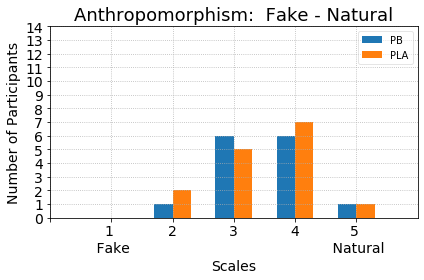

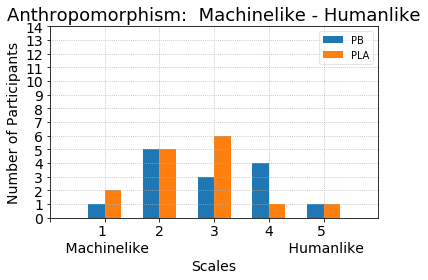

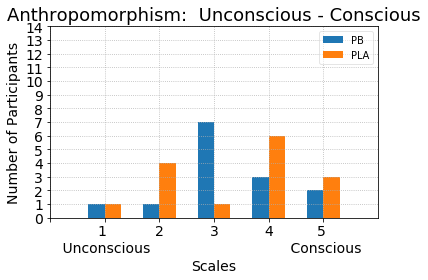

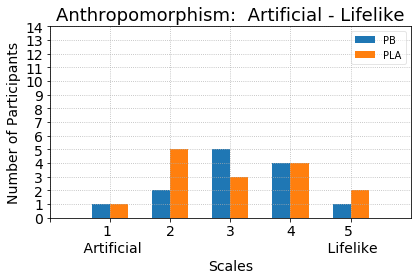

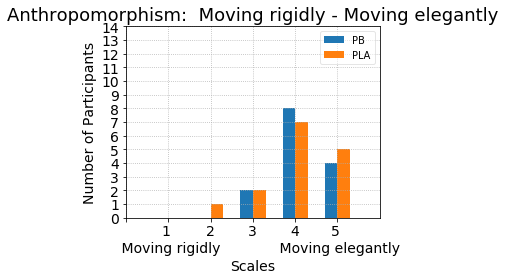

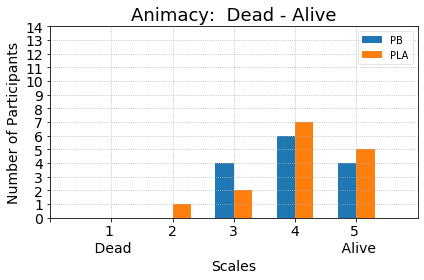

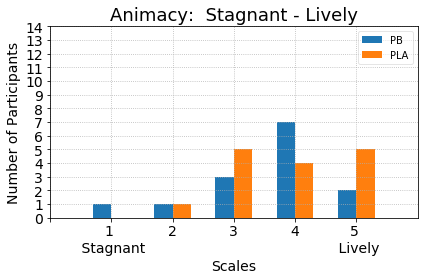

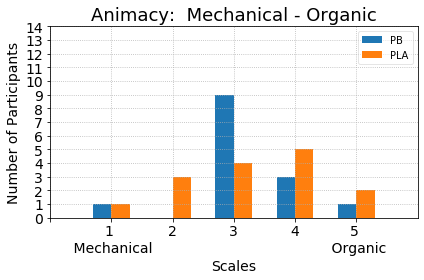

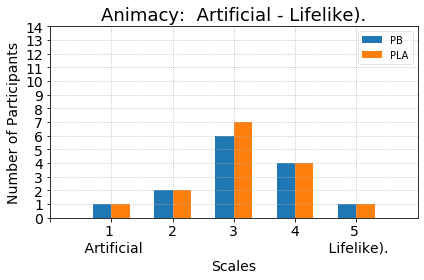

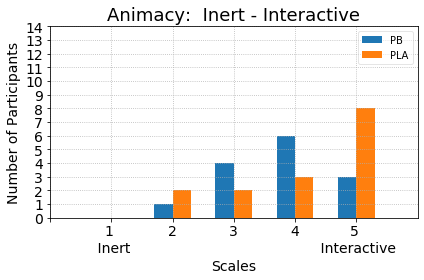

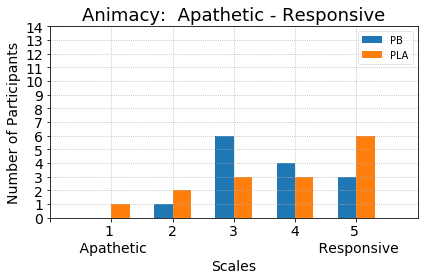

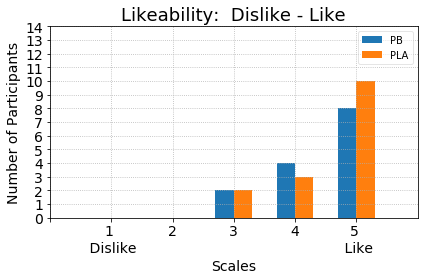

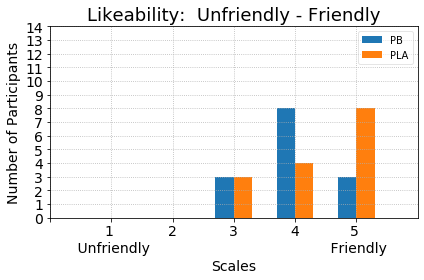

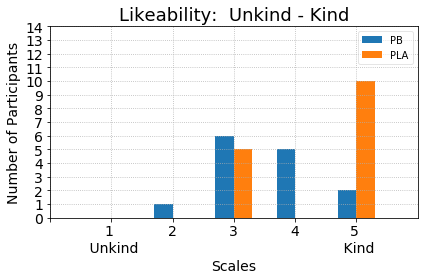

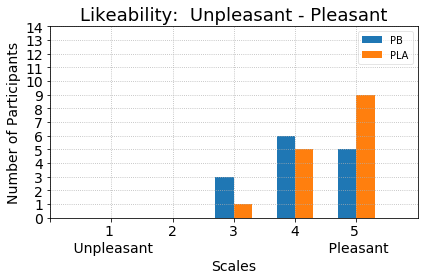

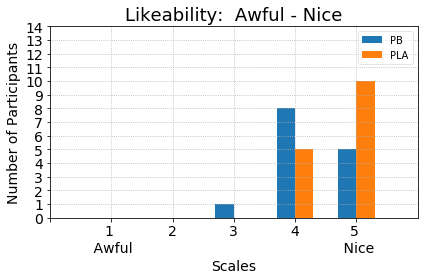

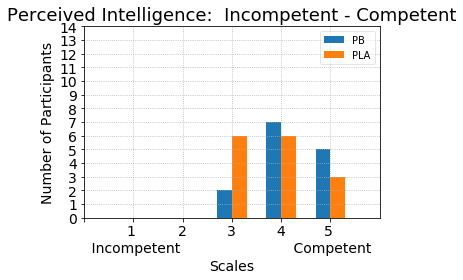

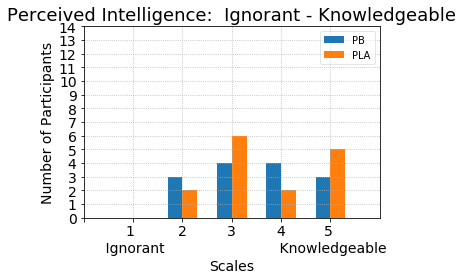

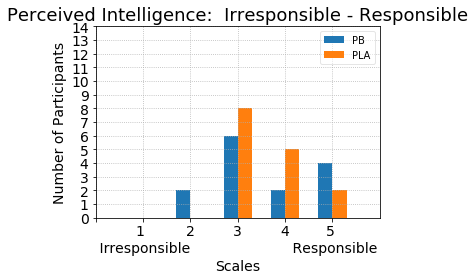

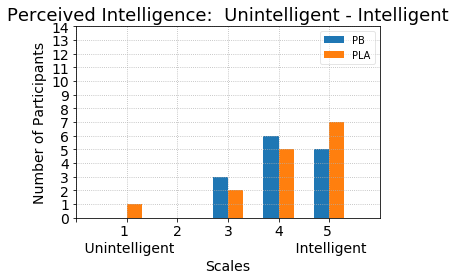

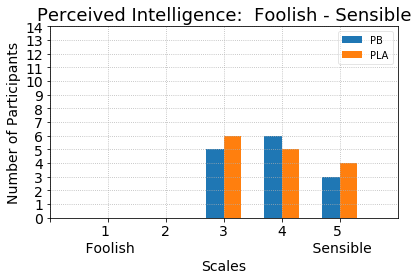

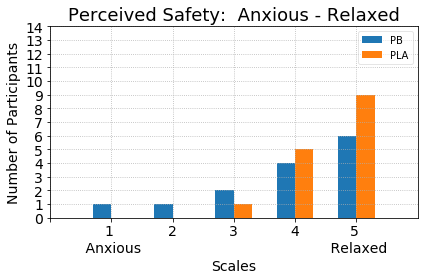

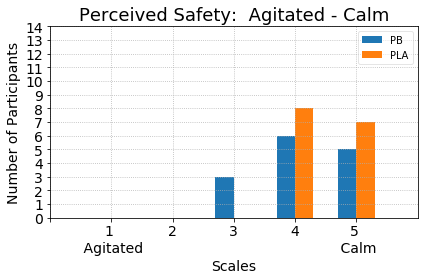

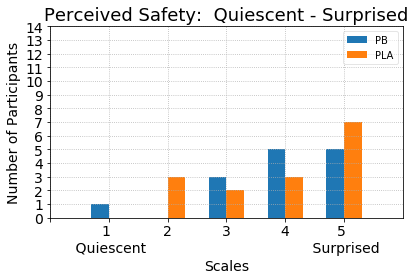

In [9]:
titles = ['Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism','Anthropomorphism',
          'Animacy','Animacy','Animacy','Animacy','Animacy','Animacy',
          'Likeability','Likeability', 'Likeability', 'Likeability', 'Likeability',  
          'Perceived Intelligence','Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 'Perceived Intelligence', 
          'Perceived Safety','Perceived Safety','Perceived Safety']
Q_start_index = 5
Q_end_index = 29

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    # baseline
    PB_scale_count = []
    for scale in range(1,6):
        PB_scale_count.append((Prescribed_Behavior[Prescribed_Behavior.columns[column_index]] == scale).sum())
    
    # parameterized learning agent
    PLA_scale_count = []
    for scale in range(1,6):
        PLA_scale_count.append((Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]] == scale).sum())
    
    # plot bar chart
    #plt.figure(figsize=(6,4))
    plt.figure()
    
    plt.bar(np.arange(1,6)-0.15, PB_scale_count, width=0.3)
    plt.bar(np.arange(1,6)+0.15, PLA_scale_count, width=0.3)
    
    plt.legend(('PB', 'PLA'),
               framealpha=0.5)
    plt.xlabel('Scales', fontsize=14)
    plt.xlim(0, 6, 1)
    plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format(low_rate), '2', '3', '4', '5 \n{}'.format(high_rate), ''),fontsize=14)
    
    plt.ylabel('Number of Participants', fontsize=14)
    plt.yticks(np.arange(0,15,1), fontsize=14)

    plt.title('{}: {} -{}'.format(titles[column_index-Q_start_index], low_rate, high_rate), fontsize=18)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    if len(titles[column_index-Q_start_index].split(' '))== 2:
        plt.savefig('./figures/GodspeedHist/{}_{}_{}_{}.pdf'.format(titles[column_index-Q_start_index].split(' ')[0],
                                                                 titles[column_index-Q_start_index].split(' ')[1],
                                                                 low_rate.split(' ')[1],
                                                                 high_rate.split(' ')[1]), dpi=300)
    else:
        plt.savefig('./figures/GodspeedHist/{}_{}_{}.pdf'.format(titles[column_index-Q_start_index],
                                                                 low_rate.split(' ')[1],
                                                                 high_rate.split(' ')[1]), dpi=300)

In [10]:
PLA_greater_than_3
PB_greater_than_3

NameError: name 'PLA_greater_than_3' is not defined

### Percentage

c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


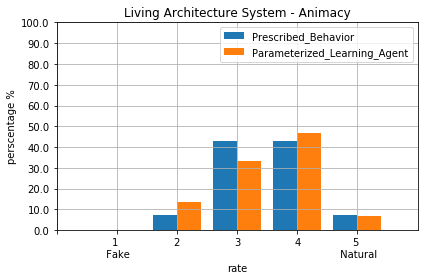

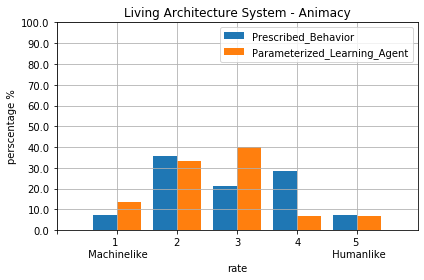

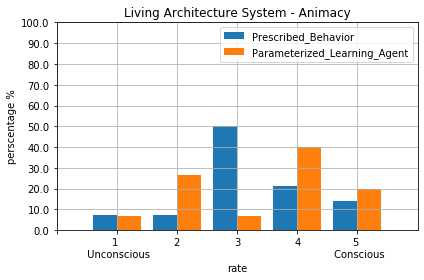

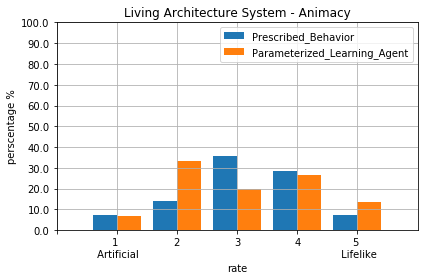

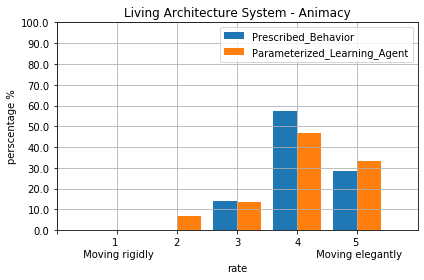

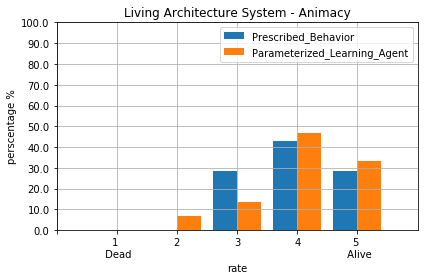

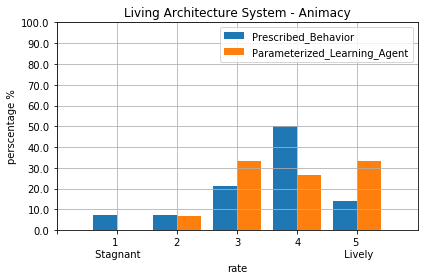

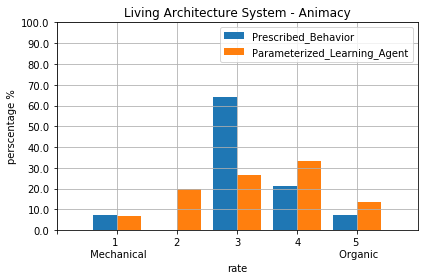

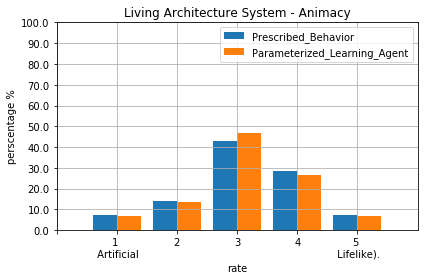

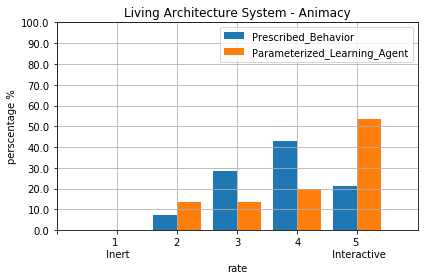

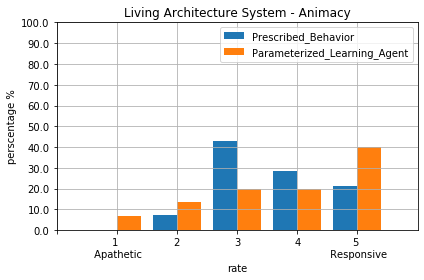

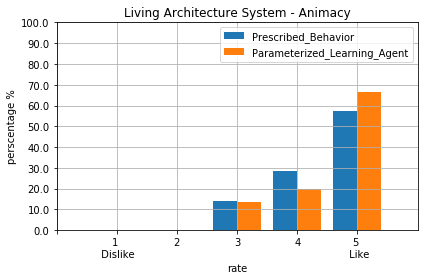

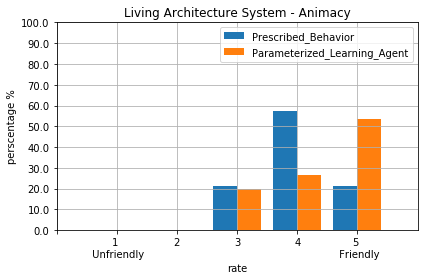

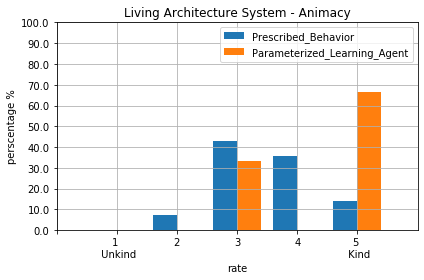

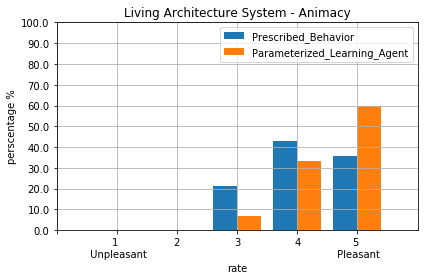

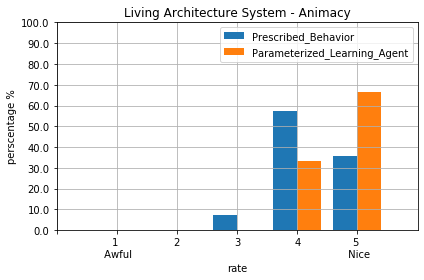

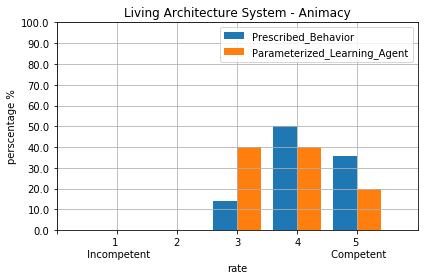

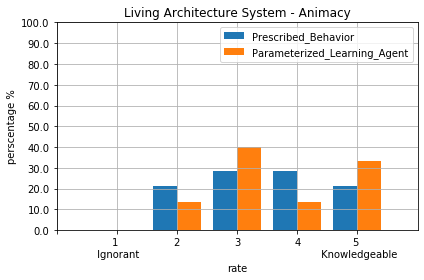

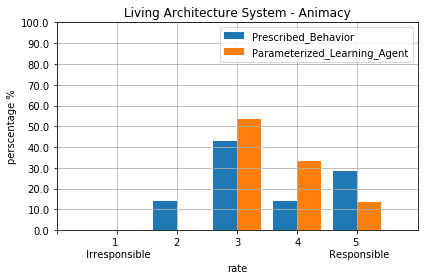

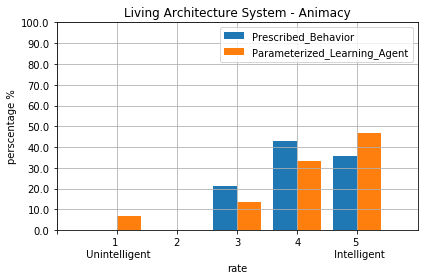

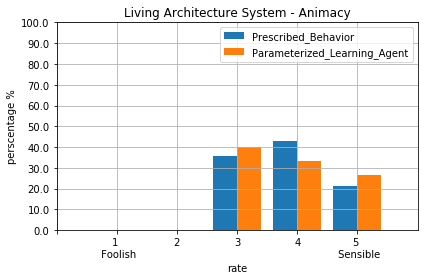

In [11]:
Q_start_index = 5
Q_end_index = 26

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    # baseline
    participant_num_baseline = len(Prescribed_Behavior[Prescribed_Behavior.columns[column_index]])
    value_count_baseline = Prescribed_Behavior[Prescribed_Behavior.columns[column_index]].value_counts()
    percent_baseline = value_count_baseline/participant_num_baseline
    # parameterized learning agent
    participant_num_para_learning_agent = len(Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]])
    value_count_para_learning_agent = Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]].value_counts()
    percent_para_learning_agent = value_count_para_learning_agent/participant_num_para_learning_agent
    # plot bar chart
    plt.figure()
    
    plt.bar(value_count_baseline.index-0.2, percent_baseline, width=0.4)
    plt.bar(value_count_para_learning_agent.index+0.2, percent_para_learning_agent, width=0.4)
    plt.legend(('Prescribed_Behavior', 'Parameterized_Learning_Agent'))
    plt.xlabel('rate')
    plt.xlim(0, 6, 1)
    plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format(low_rate), '2', '3', '4', '5 \n{}'.format(high_rate), ''))
    
    plt.ylabel('perscentage %')
    plt.ylim(0, 1, 0.1)
    y_locs, y_labels = plt.yticks()
    plt.yticks(np.arange(0,1.001,0.1), np.round(np.arange(0,1.001,0.1)*100))
    
    plt.title(question)
    plt.grid(True)
    plt.tight_layout()


### Plot Questions about Emotion
1. Please rate your emotional state on these scales: (1. Anxious 5. Relaxed)
2. Please rate your emotional state on these scales: (1. Agitated 5. Calm)
3. Please rate your emotional state on these scales: (1. Quiescent 5. Surprised)

### Count

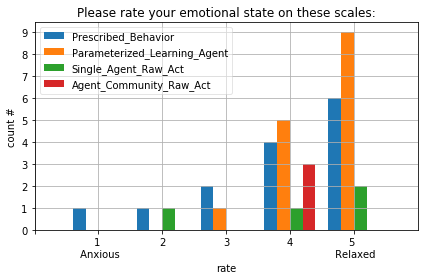

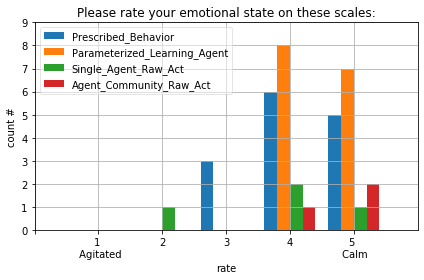

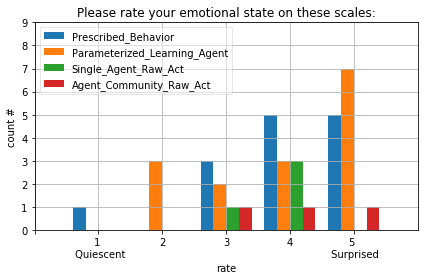

In [12]:
Q_start_index = 26
Q_end_index = 29

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    # baseline
    participant_num_baseline = len(Prescribed_Behavior[Prescribed_Behavior.columns[column_index]])
    value_count_baseline = Prescribed_Behavior[Prescribed_Behavior.columns[column_index]].value_counts()
    # parameterized learning agent
    participant_num_para_learning_agent = len(Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]])
    value_count_para_learning_agent = Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]].value_counts()
    # Single Agent Raw Act
    participant_num_single_agent = len(Single_Agent_Raw_Act[Single_Agent_Raw_Act.columns[column_index]])
    value_count_single_agent = Single_Agent_Raw_Act[Single_Agent_Raw_Act.columns[column_index]].value_counts()
    # Agent Community Raw Act
    participant_num_agent_community = len(Agent_Community_Raw_Act[Agent_Community_Raw_Act.columns[column_index]])
    value_count_agent_community = Agent_Community_Raw_Act[Agent_Community_Raw_Act.columns[column_index]].value_counts()
    
    # plot bar chart
    plt.figure()
    
    plt.bar(value_count_baseline.index-0.3, value_count_baseline, width=0.2)
    plt.bar(value_count_para_learning_agent.index-0.1, value_count_para_learning_agent, width=0.2)
    plt.bar(value_count_single_agent.index+0.1, value_count_single_agent, width=0.2)
    plt.bar(value_count_agent_community.index+0.3, value_count_agent_community, width=0.2)
    
    plt.legend(('Prescribed_Behavior', 'Parameterized_Learning_Agent','Single_Agent_Raw_Act', 'Agent_Community_Raw_Act'),
               framealpha=0.5)
    plt.xlabel('rate')
    plt.xlim(0, 6, 1)
    plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format(low_rate), '2', '3', '4', '5 \n{}'.format(high_rate), ''))
    
    plt.ylabel('count #')
    plt.yticks(np.arange(0,10,1))
    
    plt.title(question)
    plt.grid(True)
    plt.tight_layout()


### Percentage

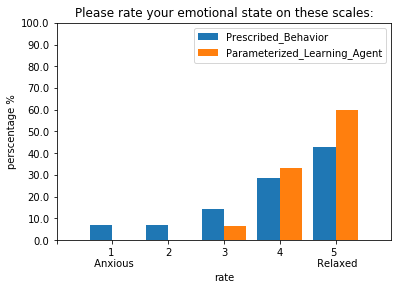

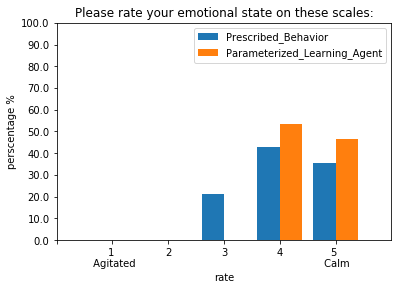

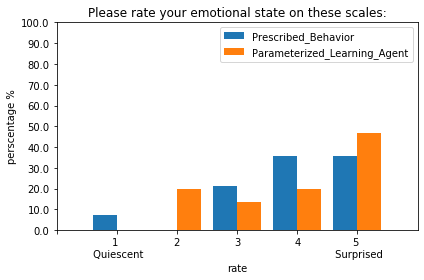

In [13]:
Q_start_index = 26
Q_end_index = 29

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop ')'
    # baseline
    participant_num_baseline = len(Prescribed_Behavior[Prescribed_Behavior.columns[column_index]])
    value_count_baseline = Prescribed_Behavior[Prescribed_Behavior.columns[column_index]].value_counts()
    percent_baseline = value_count_baseline/participant_num_baseline
    # parameterized learning agent
    participant_num_para_learning_agent = len(Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]])
    value_count_para_learning_agent = Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]].value_counts()
    percent_para_learning_agent = value_count_para_learning_agent/participant_num_para_learning_agent
    # plot bar chart
    plt.figure()#plt.subplot(Q_end_index-Q_start_index,1,column_index-Q_start_index+1)
    
    plt.bar(value_count_baseline.index-0.2, percent_baseline, width=0.4)
    plt.bar(value_count_para_learning_agent.index+0.2, percent_para_learning_agent, width=0.4)
    plt.legend(('Prescribed_Behavior', 'Parameterized_Learning_Agent'))
    plt.xlabel('rate')
    plt.xlim(0, 6, 1)
    plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format(low_rate), '2', '3', '4', '5 \n{}'.format(high_rate), ''))
    
    plt.ylabel('perscentage %')
    plt.ylim(0, 1, 0.1)
    y_locs, y_labels = plt.yticks()
    plt.yticks(np.arange(0,1.001,0.1), np.round(np.arange(0,1.001,0.1)*100))
    
    
    plt.title(question)

plt.tight_layout()

# Add all questions together, and compare

In [14]:
Prescribed_Behavior
Parameterized_Learning_Agent
Single_Agent_Raw_Act
Agent_Community_Raw_Act

,Timestamp,Research Code:,Interests and Background,How familiar are you with interactive architecture? (1. No prior knowledge 5. I am an expert.),How familiar are you with machine learning algorithms? (1. I've never heard of it 5. I'm an expert in Machine Learning.),Living Architecture System - Animacy (1. Fake 5. Natural),Living Architecture System - Animacy (1. Machinelike 5. Humanlike),Living Architecture System - Animacy (1. Unconscious 5. Conscious),Living Architecture System - Animacy (1. Artificial 5. Lifelike),Living Architecture System - Animacy (1. Moving rigidly 5. Moving elegantly),...,Living Architecture System - Animacy (1. Incompetent 5. Competent),Living Architecture System - Animacy (1. Ignorant 5. Knowledgeable),Living Architecture System - Animacy (1. Irresponsible 5. Responsible),Living Architecture System - Animacy (1. Unintelligent 5. Intelligent),Living Architecture System - Animacy (1. Foolish 5. Sensible),Please rate your emotional state on these scales: (1. Anxious 5. Relaxed),Please rate your emotional state on these scales: (1. Agitated 5. Calm),Please rate your emotional state on these scales: (1. Quiescent 5. Surprised),Any additional comments regarding your experience?,Any overall feedback?
0,2018/09/27 3:31:31 pm GMT-4,36,Architecture,3,2,4,2,4,5,5,...,5,4,5,4,5,4,5,4,NaN,NaN
1,2018/09/27 3:36:11 pm GMT-4,34,Architecture;Interactive Systems;Materials and...,3,3,4,2,3,5,4,...,5,5,5,5,5,4,5,5,Hope the action more smooth or more life likely,"Very impressive, hope the technique could be u..."
2,2018/09/27 3:47:30 pm GMT-4,37,Architecture;Design,3,4,2,2,2,1,2,...,4,4,3,4,4,4,4,3,NaN,NaN


In [15]:
Agent_Community_Raw_Act.columns[5:29]

Index(['Living Architecture System - Animacy (1. Fake 5. Natural)',
       'Living Architecture System - Animacy (1. Machinelike 5. Humanlike)',
       'Living Architecture System - Animacy (1. Unconscious 5. Conscious)',
       'Living Architecture System - Animacy (1. Artificial 5. Lifelike)',
       'Living Architecture System - Animacy (1. Moving rigidly 5. Moving elegantly)',
       'Living Architecture System - Animacy (1. Dead 5. Alive)',
       'Living Architecture System - Animacy (1. Stagnant 5. Lively)',
       'Living Architecture System - Animacy (1. Mechanical 5. Organic)',
       'Living Architecture System - Animacy (1. Artificial 5. Lifelike).1',
       'Living Architecture System - Animacy (1. Inert 5. Interactive)',
       'Living Architecture System - Animacy (1. Apathetic 5. Responsive)',
       'Living Architecture System - Animacy (1. Dislike 5. Like)',
       'Living Architecture System - Animacy (1. Unfriendly 5. Friendly)',
       'Living Architecture System -

In [16]:
Q_start_index = 5
Q_end_index = 29
accumulated_count_pb = {'1':0, '2':0, '3':0, '4':0, '5':0}
accumulated_count_pla = {'1':0, '2':0, '3':0, '4':0, '5':0}
accumulated_count_sara = {'1':0, '2':0, '3':0, '4':0, '5':0}
accumulated_count_acra = {'1':0, '2':0, '3':0, '4':0, '5':0}

for column_index in range(Q_start_index,Q_end_index):
    question, answer = Prescribed_Behavior.columns[column_index].split(' (1.')
    low_rate, high_rate = answer.split(' 5.')
    high_rate = high_rate[:-1] # drop '.)'
    # baseline
    participant_num_prescribed_behavior = len(Prescribed_Behavior[Prescribed_Behavior.columns[column_index]])
    value_count_prescribed_behavior = Prescribed_Behavior[Prescribed_Behavior.columns[column_index]].value_counts()
    # parameterized learning agent
    participant_num_para_learning_agent = len(Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]])
    value_count_para_learning_agent = Parameterized_Learning_Agent[Parameterized_Learning_Agent.columns[column_index]].value_counts()
    # Single Agent Raw Act
    participant_num_single_agent = len(Single_Agent_Raw_Act[Single_Agent_Raw_Act.columns[column_index]])
    value_count_single_agent = Single_Agent_Raw_Act[Single_Agent_Raw_Act.columns[column_index]].value_counts()
    # Agent Community Raw Act
    participant_num_agent_community = len(Agent_Community_Raw_Act[Agent_Community_Raw_Act.columns[column_index]])
    value_count_agent_community = Agent_Community_Raw_Act[Agent_Community_Raw_Act.columns[column_index]].value_counts()
    
    for i in value_count_prescribed_behavior.index:
        #print(i)
        accumulated_count_pb[str(int(i))] += value_count_prescribed_behavior[i]
    
    for i in value_count_para_learning_agent.index:
        #print(i)
        accumulated_count_pla[str(int(i))] += value_count_para_learning_agent[i]
    print(value_count_para_learning_agent)
    
    for i in value_count_single_agent.index:
        #print(i)
        accumulated_count_sara[str(int(i))] += value_count_single_agent[i]
        
    for i in value_count_agent_community.index:
        #print(i)
        accumulated_count_acra[str(int(i))] += value_count_agent_community[i]


4    7
3    5
2    2
5    1
Name: Living Architecture System - Animacy (1. Fake 5. Natural), dtype: int64
3    6
2    5
1    2
5    1
4    1
Name: Living Architecture System - Animacy (1. Machinelike 5. Humanlike), dtype: int64
4    6
2    4
5    3
3    1
1    1
Name: Living Architecture System - Animacy (1. Unconscious 5. Conscious), dtype: int64
2    5
4    4
3    3
5    2
1    1
Name: Living Architecture System - Animacy (1. Artificial 5. Lifelike), dtype: int64
4    7
5    5
3    2
2    1
Name: Living Architecture System - Animacy (1. Moving rigidly 5. Moving elegantly), dtype: int64
4    7
5    5
3    2
2    1
Name: Living Architecture System - Animacy (1. Dead 5. Alive), dtype: int64
5    5
3    5
4    4
2    1
Name: Living Architecture System - Animacy (1. Stagnant 5. Lively), dtype: int64
4    5
3    4
2    3
5    2
1    1
Name: Living Architecture System - Animacy (1. Mechanical 5. Organic), dtype: int64
3    7
4    4
2    2
5    1
1    1
Name: Living Architecture System - Ani

In [17]:
value_count_para_learning_agent

5    7
4    3
2    3
3    2
Name: Please rate your emotional state on these scales: (1. Quiescent 5. Surprised), dtype: int64

In [18]:
accumulated_count_pb

{'1': 8, '2': 21, '3': 98, '4': 126, '5': 82}

In [19]:
accumulated_count_pla

{'1': 8, '2': 33, '3': 82, '4': 107, '5': 130}

In [20]:
accumulated_count_sara

{'1': 2, '2': 18, '3': 32, '4': 29, '5': 15}

In [21]:
accumulated_count_acra

{'1': 1, '2': 11, '3': 8, '4': 26, '5': 26}

The interesting thing of this Figure is the trend of each behavior from 1 to 5.
* Prescribed_Behavior increases until 4 and decreases at rate 5.
* Parameterized_Learning_Agent increases all the way up and peaks at rate 5
* Agent_Community_Raw_Act approximitately grows up all the way up.
* Single_Agent_Raw_Act also shows up and down trending.

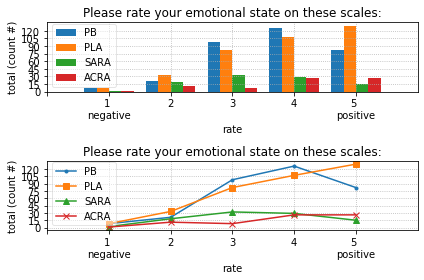

In [22]:
# plot bar chart
plt.figure()
x = np.array([int(i) for i in list(accumulated_count_pb.keys())])
count_pb = list(accumulated_count_pb.values())
count_pla = list(accumulated_count_pla.values())
count_sara = list(accumulated_count_sara.values())
count_acra = list(accumulated_count_acra.values())

plt.subplot(2,1,1)
plt.bar(x-0.3, count_pb, width=0.2)
plt.bar(x-0.1, count_pla, width=0.2)
plt.bar(x+0.1, count_sara, width=0.2)
plt.bar(x+0.3, count_acra, width=0.2)

plt.legend(('PB', 'PLA','SARA', 'ACRA'),
           framealpha=0.5)
plt.xlabel('rate')
plt.xlim(0, 6, 1)
plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format('negative'), '2', '3', '4', '5 \n{}'.format('positive'), ''))

plt.ylabel('total (count #)')
plt.yticks(np.arange(0,125,15))

plt.title(question)
plt.grid(True, linestyle=':')

plt.subplot(2,1,2)
plt.plot(x, count_pb,'-', marker='.')
plt.plot(x, count_pla,'-', marker='s')
plt.plot(x, count_sara,'-', marker='^')
plt.plot(x, count_acra,'-', marker='x')

plt.legend(('PB', 'PLA','SARA', 'ACRA'),
           framealpha=0.5)
plt.xlabel('rate')
plt.xlim(0, 6, 1)
plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format('negative'), '2', '3', '4', '5 \n{}'.format('positive'), ''))

plt.ylabel('total (count #)')
plt.yticks(np.arange(0,125,15))

plt.title(question)
plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/LAS_Godspeed_total_count.png', dpi=300)


In [23]:
count_pla

[8, 33, 82, 107, 130]

In [24]:
sum(accumulated_count_pb.values())

335

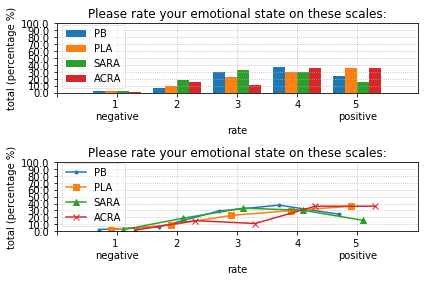

In [25]:

plt.figure()
x = np.array([int(i) for i in list(accumulated_count_pb.keys())])
percent_pb = list(accumulated_count_pb.values())/sum(accumulated_count_pb.values())
percent_pla = list(accumulated_count_pla.values())/sum(accumulated_count_pla.values())
percent_sara = list(accumulated_count_sara.values())/sum(accumulated_count_sara.values())
percent_acra = list(accumulated_count_acra.values())/sum(accumulated_count_acra.values())

# plot bar chart
plt.subplot(2,1,1)
plt.bar(x-0.3, percent_pb, width=0.2)
plt.bar(x-0.1, percent_pla, width=0.2)
plt.bar(x+0.1, percent_sara, width=0.2)
plt.bar(x+0.3, percent_acra, width=0.2)
plt.legend(('PB', 'PLA','SARA', 'ACRA'),
           framealpha=0.5)
plt.xlabel('rate')
plt.xlim(0, 6, 1)
plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format('negative'), '2', '3', '4', '5 \n{}'.format('positive'), ''))

plt.ylabel('total (percentage %)')
plt.ylim(0, 1, 0.1)
y_locs, y_labels = plt.yticks()
plt.yticks(np.arange(0,1.001,0.1), np.round(np.arange(0,1.001,0.1)*100))

plt.title(question)
plt.grid(True, linestyle=':')

# plot line chart
plt.subplot(2,1,2)
plt.plot(x-0.3, percent_pb,'-', marker='.')
plt.plot(x-0.1, percent_pla,'-', marker='s')
plt.plot(x+0.1, percent_sara,'-', marker='^')
plt.plot(x+0.3, percent_acra,'-', marker='x')

plt.legend(('PB', 'PLA','SARA', 'ACRA'),
           framealpha=0.5)
plt.xlabel('rate')
plt.xlim(0, 6, 1)
plt.xticks(np.arange(0, 6, 1), ('', '1 \n{}'.format('negative'), '2', '3', '4', '5 \n{}'.format('positive'), ''))

plt.ylabel('total (percentage %)')
plt.ylim(0, 1, 0.1)
y_locs, y_labels = plt.yticks()
plt.yticks(np.arange(0,1.001,0.1), np.round(np.arange(0,1.001,0.1)*100))

plt.title(question)
plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/LAS_Godspeed_total_percentage.png', dpi=300)

### Chi-squared Test
https://www.mathsisfun.com/data/chi-square-test.html

1. **Get the data table first**
2. **Then, just use this calculator: https://www.mathsisfun.com/data/chi-square-calculator.html**

In [26]:
from scipy.stats import chisquare


#### only for PB and PLA

In [27]:
observed_value = pd.DataFrame({'PB':count_pb, 'PLA':count_pla})
observed_value

,PB,PLA
0,8,8
1,21,33
2,98,82
3,126,107
4,82,130


In [28]:
col_sum = observed_value.sum(axis = 0)
row_sum = observed_value.sum(axis = 1)
all_sum = observed_value.sum().sum()
expected_value = np.zeros(observed_value.shape)
for i in range(observed_value.shape[0]):
    for j in range(observed_value.shape[1]):
        print('({}*{})/{}'.format(row_sum[i], col_sum[j], all_sum))
        expected_value[i,j] = (row_sum[i] * col_sum[j])/all_sum
#expected_value = 

(16*335)/695
(16*360)/695
(54*335)/695
(54*360)/695
(180*335)/695
(180*360)/695
(233*335)/695
(233*360)/695
(212*335)/695
(212*360)/695


In [29]:
expected_value

array([[  7.71223022,   8.28776978],
       [ 26.02877698,  27.97122302],
       [ 86.76258993,  93.23741007],
       [112.30935252, 120.69064748],
       [102.18705036, 109.81294964]])

In [30]:
np.subtract(observed_value.values, expected_value)

array([[  0.28776978,  -0.28776978],
       [ -5.02877698,   5.02877698],
       [ 11.23741007, -11.23741007],
       [ 13.69064748, -13.69064748],
       [-20.18705036,  20.18705036]])

In [31]:
chi_square = sum(np.divide((np.subtract(observed_value.values, expected_value))**2, expected_value)).sum()
chi_square

15.62710943312219

#### All Behavior Modes

In [32]:
observed_value = pd.DataFrame({'PB':count_pb, 'PLA':count_pla, 'SARA':count_sara, 'ACRA':count_acra})
observed_value

,PB,PLA,SARA,ACRA
0,8,8,2,1
1,21,33,18,11
2,98,82,32,8
3,126,107,29,26
4,82,130,15,26


In [33]:
observed_value.sum().sum()

863

# Count of Rate of Each Question

In [34]:
animacy_questions = Prescribed_Behavior.columns[5:29]
#Prescribed_Behavior[animacy_questions]

In [35]:
animacy_questions

Index(['Living Architecture System - Animacy (1. Fake 5. Natural)',
       'Living Architecture System - Animacy (1. Machinelike 5. Humanlike)',
       'Living Architecture System - Animacy (1. Unconscious 5. Conscious)',
       'Living Architecture System - Animacy (1. Artificial 5. Lifelike)',
       'Living Architecture System - Animacy (1. Moving rigidly 5. Moving elegantly)',
       'Living Architecture System - Animacy (1. Dead 5. Alive)',
       'Living Architecture System - Animacy (1. Stagnant 5. Lively)',
       'Living Architecture System - Animacy (1. Mechanical 5. Organic)',
       'Living Architecture System - Animacy (1. Artificial 5. Lifelike).1',
       'Living Architecture System - Animacy (1. Inert 5. Interactive)',
       'Living Architecture System - Animacy (1. Apathetic 5. Responsive)',
       'Living Architecture System - Animacy (1. Dislike 5. Like)',
       'Living Architecture System - Animacy (1. Unfriendly 5. Friendly)',
       'Living Architecture System -

In [36]:
#Parameterized_Learning_Agent[animacy_questions]

In [37]:
#Single_Agent_Raw_Act[animacy_questions]

In [38]:
#Agent_Community_Raw_Act[animacy_questions]

In [39]:
def get_rate_count(human_survey_data):
    """
    
    """
    row_num, col_num = human_survey_data.shape
    animacy_question_name = []
    
    animacy_data = human_survey_data[human_survey_data.columns[5:29]]
    for col_name in animacy_data.columns:
        q1, q5 = col_name.split('1. ')[1].split(' 5. ')
        q5 = q5.split(')')[0]
        question = '{}-{}'.format(q1, q5)
        #print(question)
        animacy_question_name.append(question)
   
    animacy_question_rate_count = np.zeros([animacy_data.shape[1], 5])
    for i, col_name in enumerate(animacy_data.columns):
        #print(i)
        for d in animacy_data[col_name].values:
            if math.isnan(d):
                continue
            else:
                animacy_question_rate_count[i][int(d)-1] += 1
    return animacy_question_name, animacy_question_rate_count

### Prescribed_Behavior

In [40]:
animacy_question_name, animacy_question_rate_count = get_rate_count(Prescribed_Behavior)
animacy_question_rate_count

array([[0., 1., 6., 6., 1.],
       [1., 5., 3., 4., 1.],
       [1., 1., 7., 3., 2.],
       [1., 2., 5., 4., 1.],
       [0., 0., 2., 8., 4.],
       [0., 0., 4., 6., 4.],
       [1., 1., 3., 7., 2.],
       [1., 0., 9., 3., 1.],
       [1., 2., 6., 4., 1.],
       [0., 1., 4., 6., 3.],
       [0., 1., 6., 4., 3.],
       [0., 0., 2., 4., 8.],
       [0., 0., 3., 8., 3.],
       [0., 1., 6., 5., 2.],
       [0., 0., 3., 6., 5.],
       [0., 0., 1., 8., 5.],
       [0., 0., 2., 7., 5.],
       [0., 3., 4., 4., 3.],
       [0., 2., 6., 2., 4.],
       [0., 0., 3., 6., 5.],
       [0., 0., 5., 6., 3.],
       [1., 1., 2., 4., 6.],
       [0., 0., 3., 6., 5.],
       [1., 0., 3., 5., 5.]])

In [41]:
animacy_question_rate_count.sum(axis=0)

array([  8.,  21.,  98., 126.,  82.])

In [42]:
score_pb = []
for i in range(animacy_question_rate_count.shape[0]):
    score_pb.append(np.sum(np.multiply(animacy_question_rate_count[i,:], [1, 2, 3, 4, 5])))
score_pb

[49.0,
 41.0,
 46.0,
 41.0,
 58.0,
 56.0,
 50.0,
 45.0,
 44.0,
 53.0,
 51.0,
 62.0,
 56.0,
 50.0,
 58.0,
 60.0,
 59.0,
 49.0,
 50.0,
 58.0,
 54.0,
 55.0,
 58.0,
 55.0]

In [43]:
sum(score_pb)

1258.0

### Parameterized_Learning_Agent

In [44]:
animacy_question_name, animacy_question_rate_count = get_rate_count(Parameterized_Learning_Agent)
animacy_question_rate_count

array([[ 0.,  2.,  5.,  7.,  1.],
       [ 2.,  5.,  6.,  1.,  1.],
       [ 1.,  4.,  1.,  6.,  3.],
       [ 1.,  5.,  3.,  4.,  2.],
       [ 0.,  1.,  2.,  7.,  5.],
       [ 0.,  1.,  2.,  7.,  5.],
       [ 0.,  1.,  5.,  4.,  5.],
       [ 1.,  3.,  4.,  5.,  2.],
       [ 1.,  2.,  7.,  4.,  1.],
       [ 0.,  2.,  2.,  3.,  8.],
       [ 1.,  2.,  3.,  3.,  6.],
       [ 0.,  0.,  2.,  3., 10.],
       [ 0.,  0.,  3.,  4.,  8.],
       [ 0.,  0.,  5.,  0., 10.],
       [ 0.,  0.,  1.,  5.,  9.],
       [ 0.,  0.,  0.,  5., 10.],
       [ 0.,  0.,  6.,  6.,  3.],
       [ 0.,  2.,  6.,  2.,  5.],
       [ 0.,  0.,  8.,  5.,  2.],
       [ 1.,  0.,  2.,  5.,  7.],
       [ 0.,  0.,  6.,  5.,  4.],
       [ 0.,  0.,  1.,  5.,  9.],
       [ 0.,  0.,  0.,  8.,  7.],
       [ 0.,  3.,  2.,  3.,  7.]])

In [45]:
animacy_question_rate_count.sum(axis=0)

array([  8.,  33.,  82., 107., 130.])

In [46]:
score_pla = []
for i in range(animacy_question_rate_count.shape[0]):
    score_pla.append(np.sum(np.multiply(animacy_question_rate_count[i,:], [1, 2, 3, 4, 5])))
score_pla

[52.0,
 39.0,
 51.0,
 46.0,
 61.0,
 61.0,
 58.0,
 49.0,
 47.0,
 62.0,
 56.0,
 68.0,
 65.0,
 65.0,
 68.0,
 70.0,
 57.0,
 55.0,
 54.0,
 62.0,
 58.0,
 68.0,
 67.0,
 59.0]

In [47]:
sum(score_pla)

1398.0

### Single_Agent_Raw_Act

In [48]:
animacy_question_name, animacy_question_rate_count = get_rate_count(Single_Agent_Raw_Act)
animacy_question_rate_count

array([[0., 1., 3., 0., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 2., 0.],
       [0., 1., 3., 0., 0.],
       [0., 3., 0., 1., 0.],
       [0., 1., 1., 1., 1.],
       [0., 0., 2., 0., 2.],
       [1., 0., 2., 1., 0.],
       [0., 1., 1., 2., 0.],
       [0., 1., 1., 0., 2.],
       [0., 1., 1., 2., 0.],
       [0., 0., 0., 2., 2.],
       [0., 2., 1., 1., 0.],
       [0., 0., 3., 1., 0.],
       [0., 0., 2., 1., 1.],
       [0., 0., 1., 2., 1.],
       [0., 0., 2., 1., 1.],
       [0., 1., 2., 1., 0.],
       [0., 0., 2., 1., 1.],
       [0., 0., 2., 1., 1.],
       [0., 2., 0., 2., 0.],
       [0., 1., 0., 1., 2.],
       [0., 1., 0., 2., 1.],
       [0., 0., 1., 3., 0.]])

In [49]:
animacy_question_rate_count.sum(axis=0)

array([ 2., 18., 32., 29., 15.])

In [50]:
score_sara = []
for i in range(animacy_question_rate_count.shape[0]):
    score_sara.append(np.sum(np.multiply(animacy_question_rate_count[i,:], [1, 2, 3, 4, 5])))
score_sara

[11.0,
 10.0,
 13.0,
 11.0,
 10.0,
 14.0,
 16.0,
 11.0,
 13.0,
 15.0,
 13.0,
 18.0,
 11.0,
 13.0,
 15.0,
 16.0,
 15.0,
 12.0,
 15.0,
 15.0,
 12.0,
 16.0,
 15.0,
 15.0]

In [51]:
sum(score_sara)

325.0

### Agent_Community_Raw_Act

In [52]:
animacy_question_name, animacy_question_rate_count = get_rate_count(Agent_Community_Raw_Act)
animacy_question_rate_count

array([[0., 1., 0., 2., 0.],
       [0., 3., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [1., 0., 0., 0., 2.],
       [0., 1., 0., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 1., 0., 1., 1.],
       [0., 0., 2., 1., 0.],
       [0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 1.],
       [0., 0., 0., 2., 1.],
       [0., 0., 1., 0., 2.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 2.],
       [0., 0., 0., 1., 2.],
       [0., 0., 0., 1., 2.],
       [0., 0., 0., 2., 1.],
       [0., 0., 1., 0., 2.],
       [0., 0., 0., 2., 1.],
       [0., 0., 0., 1., 2.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 1., 2.],
       [0., 0., 1., 1., 1.]])

In [53]:
animacy_question_rate_count.sum(axis=0)

array([ 1., 11.,  8., 26., 26.])

In [54]:
score_acra = []
for i in range(animacy_question_rate_count.shape[0]):
    score_acra.append(np.sum(np.multiply(animacy_question_rate_count[i,:], [1, 2, 3, 4, 5])))
score_acra

[10.0,
 6.0,
 9.0,
 11.0,
 11.0,
 9.0,
 11.0,
 10.0,
 11.0,
 11.0,
 11.0,
 13.0,
 13.0,
 12.0,
 14.0,
 14.0,
 14.0,
 13.0,
 13.0,
 13.0,
 14.0,
 12.0,
 14.0,
 12.0]

In [55]:
sum(score_acra)

281.0

In [56]:
animacy_question_name

['Fake-Natural',
 'Machinelike-Humanlike',
 'Unconscious-Conscious',
 'Artificial-Lifelike',
 'Moving rigidly-Moving elegantly',
 'Dead-Alive',
 'Stagnant-Lively',
 'Mechanical-Organic',
 'Artificial-Lifelike',
 'Inert-Interactive',
 'Apathetic-Responsive',
 'Dislike-Like',
 'Unfriendly-Friendly',
 'Unkind-Kind',
 'Unpleasant-Pleasant',
 'Awful-Nice',
 'Incompetent-Competent',
 'Ignorant-Knowledgeable',
 'Irresponsible-Responsible',
 'Unintelligent-Intelligent',
 'Foolish-Sensible',
 'Anxious-Relaxed',
 'Agitated-Calm',
 'Quiescent-Surprised']

In [57]:
score = pd.DataFrame([score_pb, score_pla, score_sara, score_acra])
score

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,49.0,41.0,46.0,41.0,58.0,56.0,50.0,45.0,44.0,53.0,...,58.0,60.0,59.0,49.0,50.0,58.0,54.0,55.0,58.0,55.0
1,52.0,39.0,51.0,46.0,61.0,61.0,58.0,49.0,47.0,62.0,...,68.0,70.0,57.0,55.0,54.0,62.0,58.0,68.0,67.0,59.0
2,11.0,10.0,13.0,11.0,10.0,14.0,16.0,11.0,13.0,15.0,...,15.0,16.0,15.0,12.0,15.0,15.0,12.0,16.0,15.0,15.0
3,10.0,6.0,9.0,11.0,11.0,9.0,11.0,10.0,11.0,11.0,...,14.0,14.0,14.0,13.0,13.0,13.0,14.0,12.0,14.0,12.0


In [58]:
score.sum(axis=0)

0     122.0
1      96.0
2     119.0
3     109.0
4     140.0
5     140.0
6     135.0
7     115.0
8     115.0
9     141.0
10    131.0
11    161.0
12    145.0
13    140.0
14    155.0
15    160.0
16    145.0
17    129.0
18    132.0
19    148.0
20    138.0
21    151.0
22    154.0
23    141.0
dtype: float64

In [59]:
score.sum(axis=1).sum()

3262.0

In [60]:
score_matrix = score.values
score_matrix[0,:]

array([49., 41., 46., 41., 58., 56., 50., 45., 44., 53., 51., 62., 56.,
       50., 58., 60., 59., 49., 50., 58., 54., 55., 58., 55.])

In [61]:
for col in score.columns:
    print('{} {} {} {}'.format(score[col][0], score[col][1], score[col][2], score[col][3]))

49.0 52.0 11.0 10.0
41.0 39.0 10.0 6.0
46.0 51.0 13.0 9.0
41.0 46.0 11.0 11.0
58.0 61.0 10.0 11.0
56.0 61.0 14.0 9.0
50.0 58.0 16.0 11.0
45.0 49.0 11.0 10.0
44.0 47.0 13.0 11.0
53.0 62.0 15.0 11.0
51.0 56.0 13.0 11.0
62.0 68.0 18.0 13.0
56.0 65.0 11.0 13.0
50.0 65.0 13.0 12.0
58.0 68.0 15.0 14.0
60.0 70.0 16.0 14.0
59.0 57.0 15.0 14.0
49.0 55.0 12.0 13.0
50.0 54.0 15.0 13.0
58.0 62.0 15.0 13.0
54.0 58.0 12.0 14.0
55.0 68.0 16.0 12.0
58.0 67.0 15.0 14.0
55.0 59.0 15.0 12.0


**Note:**
1. PLA has one more participant, so we cannot compare absolute value.
2. Comparing Human Survey with IR signal, the results are not consistent, because according to reward signal SARA is better than ACRA, but the Human Survey shows opposite results. One probability is ACRA has only 3 participants, and this might be baised if the 3 participants all rate a high grade.

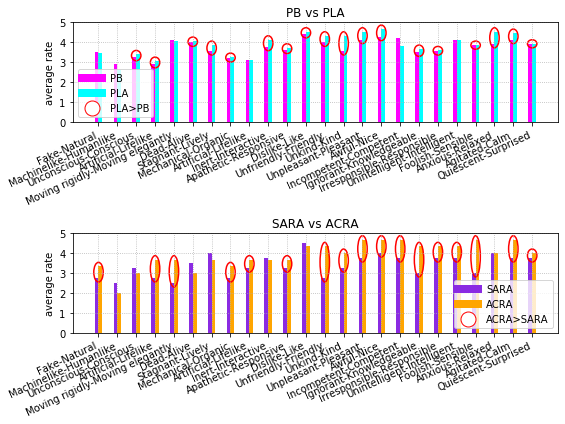

In [62]:
normalized_score_pb = np.array(score_pb)/14
normalized_score_pla = np.array(score_pla)/15
normalized_score_sara = np.array(score_sara)/4
normalized_score_acra = np.array(score_acra)/3

plt.figure(figsize=(8, 6))

#PB vs PLA
plt.subplot(2,1,1)
plt.bar(np.arange(24)-0.1, normalized_score_pb, width=0.2, color='fuchsia')
plt.bar(np.arange(24)+0.1, normalized_score_pla, width=0.2, color='aqua')
legend_elements = [Line2D([0], [0], color='fuchsia', lw=8, label='PB'),
                   Line2D([0], [0], color='aqua', lw=8, label='PLA'),
                   Line2D([0], [0], lw=0, marker='o', color='r', label='PLA>PB', markerfacecolor='w', markersize=15)]
plt.legend(handles=legend_elements)
plt.xticks(np.arange(24), animacy_question_name, rotation=25, horizontalalignment='right')
plt.yticks(np.arange(5.1))
plt.ylabel('average rate')
plt.title('PB vs PLA')

pla_greater_than_pb_count = 0
pla_equal_to_pb_count = 0
for i in range(24):
    if normalized_score_pla[i]>normalized_score_pb[i]:
        pla_greater_than_pb_count += 1
        #print('cricle')
        loc_x = i
        loc_y = (normalized_score_pla[i] + normalized_score_pb[i])/2
        e_h = (normalized_score_pla[i] - normalized_score_pb[i])+0.4
        ellipse = patches.Ellipse((loc_x, loc_y), 0.5, e_h, fill = False, color='r', linestyle='-', linewidth=1.5)
        plt.gca().add_patch(ellipse)
    elif normalized_score_pla[i]==normalized_score_pb[i]:
        pla_equal_to_pb_count += 1
        print('equal')
plt.grid(True, linestyle=':')

# SARA vs ACRA
plt.subplot(2,1,2)
plt.bar(np.arange(24)-0.1, normalized_score_sara, width=0.2, color='blueviolet')
plt.bar(np.arange(24)+0.1, normalized_score_acra, width=0.2, color='orange')
legend_elements = [Line2D([0], [0], color='blueviolet', lw=8, label='SARA'),
                   Line2D([0], [0], color='orange', lw=8, label='ACRA'),
                   Line2D([0], [0], lw=0, marker='o', color='r', label='ACRA>SARA', markerfacecolor='w', markersize=15)]
plt.legend(handles=legend_elements)
plt.xticks(np.arange(24))
plt.xticks(np.arange(24), animacy_question_name, rotation=25, horizontalalignment='right')
plt.yticks(np.arange(5.1))
plt.ylabel('average rate')
plt.title('SARA vs ACRA')

acra_greater_than_sara_count = 0
acra_equal_to_sara_count = 0
for i in range(24):
    if normalized_score_sara[i]<normalized_score_acra[i]:
        acra_greater_than_sara_count += 1
        #print('cricle')
        loc_x = i
        loc_y = (normalized_score_sara[i] + normalized_score_acra[i])/2
        e_h = (normalized_score_acra[i] - normalized_score_sara[i])+0.4
        ellipse = patches.Ellipse((loc_x, loc_y), 0.5, e_h, fill = False, color='r', linestyle='-', linewidth=1.5)
        plt.gca().add_patch(ellipse)
    elif normalized_score_pla[i]==normalized_score_pb[i]:
        acra_equal_to_sara_count += 1
        print('equal')
plt.grid(True, linestyle=':')

plt.tight_layout()
plt.savefig('./figures/bar_chart_normalized_rate.png', dpi=300)


In [63]:
normalized_score_pb

array([3.5       , 2.92857143, 3.28571429, 2.92857143, 4.14285714,
       4.        , 3.57142857, 3.21428571, 3.14285714, 3.78571429,
       3.64285714, 4.42857143, 4.        , 3.57142857, 4.14285714,
       4.28571429, 4.21428571, 3.5       , 3.57142857, 4.14285714,
       3.85714286, 3.92857143, 4.14285714, 3.92857143])

In [64]:
normalized_score_pla

array([3.46666667, 2.6       , 3.4       , 3.06666667, 4.06666667,
       4.06666667, 3.86666667, 3.26666667, 3.13333333, 4.13333333,
       3.73333333, 4.53333333, 4.33333333, 4.33333333, 4.53333333,
       4.66666667, 3.8       , 3.66666667, 3.6       , 4.13333333,
       3.86666667, 4.53333333, 4.46666667, 3.93333333])

In [65]:
pla_greater_than_pb_count
pla_equal_to_pb_count
pla_less_than_pb_count = 21 - pla_greater_than_pb_count - pla_equal_to_pb_count


acra_greater_than_sara_count
acra_equal_to_sara_count
acra_less_than_sara_count = 21 - acra_greater_than_sara_count - acra_equal_to_sara_count

In [66]:
pla_greater_than_pb_count

18

In [67]:
acra_greater_than_sara_count

17

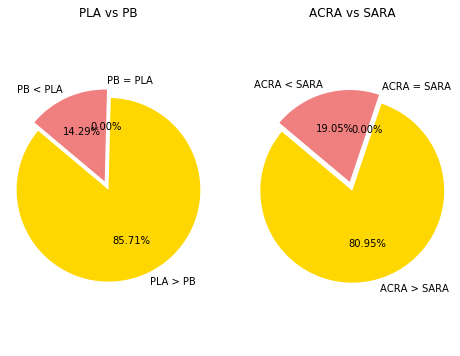

<Figure size 432x288 with 0 Axes>

In [68]:
 # Plot
plt.figure(figsize=(8,6))
# PLA vs PB
plt.subplot(1,2,1)
labels = 'PLA > PB', 'PB = PLA', 'PB < PLA'
sizes = [pla_greater_than_pb_count, pla_equal_to_pb_count, pla_less_than_pb_count]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('PLA vs PB')

# acra vs SARA
plt.subplot(1,2,2)
labels = 'ACRA > SARA', 'ACRA = SARA', 'ACRA < SARA'
sizes = [acra_greater_than_sara_count, acra_equal_to_sara_count, acra_less_than_sara_count]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('ACRA vs SARA')

plt.show()
plt.savefig('./figures/pie_chart_greater_than_ratio.png', dpi=300)

In [69]:
animacy_question_name

['Fake-Natural',
 'Machinelike-Humanlike',
 'Unconscious-Conscious',
 'Artificial-Lifelike',
 'Moving rigidly-Moving elegantly',
 'Dead-Alive',
 'Stagnant-Lively',
 'Mechanical-Organic',
 'Artificial-Lifelike',
 'Inert-Interactive',
 'Apathetic-Responsive',
 'Dislike-Like',
 'Unfriendly-Friendly',
 'Unkind-Kind',
 'Unpleasant-Pleasant',
 'Awful-Nice',
 'Incompetent-Competent',
 'Ignorant-Knowledgeable',
 'Irresponsible-Responsible',
 'Unintelligent-Intelligent',
 'Foolish-Sensible',
 'Anxious-Relaxed',
 'Agitated-Calm',
 'Quiescent-Surprised']

# Method 2: Grade Averaging Within Each Godspeed Measurement


In [70]:
# Prescribed_Behavior
# Parameterized_Learning_Agent
# Single_Agent_Raw_Act
# Agent_Community_Raw_Act

In [71]:
Godspeed_category = {'Anthropomorphism': [5, 10],
                     'Animacy': [10, 16],
                     'Likeability': [16, 21],
                     'PerceivedIntelligence': [21, 26],
                     'PerceivedSafety': [26, 29]}

In [72]:
Godspeed_category.keys()

dict_keys(['Anthropomorphism', 'Animacy', 'Likeability', 'PerceivedIntelligence', 'PerceivedSafety'])

In [73]:
def get_category_avg_for_each_participant(data, behavior_mode='PB'):
    """
    Args:
        data (pd.DataFrame)
        behavior_mode (string):
            PB: prescribed behavior
            PLA: parameterized learning agent
            SARA: single agent raw act
            ACRA: agent community raw act
    Returns:
        average_grade (pd.DataFrame):
    """
    average_grade = pd.DataFrame()
    for category in Godspeed_category.keys():
        #print(category)
        category_sum = data.iloc[:,Godspeed_category[category][0]:Godspeed_category[category][1]].sum(axis=1)
        category_avg = category_sum / (Godspeed_category[category][1]-Godspeed_category[category][0])
        #print(category_avg)
        average_grade[category]=category_avg
        
    average_grade['Overall_Avg'] = average_grade.mean(axis=1)
    if behavior_mode=='PB':
        behavior_mode_code = 0
    elif behavior_mode=='PLA':
        behavior_mode_code = 1
    elif behavior_mode=='SARA':
        behavior_mode_code = 2
    elif behavior_mode=='ACRA':
        behavior_mode_code = 3
    else:
        print('Please choose a proper behaivor_mode!')
    average_grade['Behavior']= np.ones(data.shape[0],dtype=int)*behavior_mode_code
    return average_grade
    
avg_PB = get_category_avg_for_each_participant(Prescribed_Behavior, behavior_mode='PB')
avg_PLA = get_category_avg_for_each_participant(Parameterized_Learning_Agent, behavior_mode='PLA')
avg_SARA = get_category_avg_for_each_participant(Single_Agent_Raw_Act, behavior_mode='SARA')
avg_ACRA = get_category_avg_for_each_participant(Agent_Community_Raw_Act, behavior_mode='ACRA')
    

In [74]:
avg_all_participants = pd.concat([avg_PB, avg_PLA, avg_SARA, avg_ACRA])
avg_PB_PLA = pd.concat([avg_PB, avg_PLA])
avg_SARA_ACRA = pd.concat([avg_SARA, avg_ACRA])

### PB vs PLA

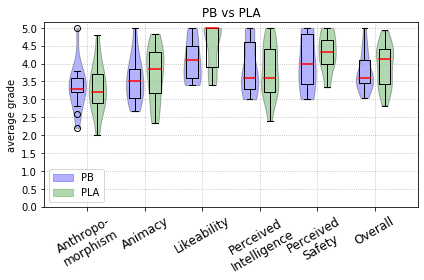

In [75]:
xtick_label = ['Anthropo-\nmorphism', 'Animacy', 'Likeability', 'Perceived\nIntelligence', 'Perceived\nSafety', 'Overall']
plt.figure()

plt.plot()
medianprops = dict(linestyle='-', linewidth=1.5, color='red')
# PB
PB_violin_plot = plt.violinplot(avg_PB.values[:,0:6], positions = np.arange(1.15,12.1,2), widths=0.6, showextrema=False)
for pc in PB_violin_plot['bodies']:
    pc.set_facecolor('blue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PB_box_plot = plt.boxplot(avg_PB.values[:,0:6], positions = np.arange(1.15,12.1,2), widths=0.4, medianprops=medianprops)

# PLA
PLA_violin_plot = plt.violinplot(avg_PLA.values[:,0:6], positions = np.arange(1.85,12.1,2), widths=0.6, showextrema=False)
for pc in PLA_violin_plot['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PLA_box_plot = plt.boxplot(avg_PLA.values[:,0:6], positions = np.arange(1.85,12.1,2), widths=0.4, medianprops=medianprops)

plt.xlim((0,13))
plt.xticks(np.arange(1.5,12.1,2), xtick_label, rotation=30, fontsize=12)

plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('average grade')
plt.title('PB vs PLA')

# customize legend
PB_legend_patch = Patch(color='blue', label='PB', alpha=0.3)
PLA_legend_patch = Patch(color='green', label='PLA', alpha=0.3)
plt.legend(handles=[PB_legend_patch, PLA_legend_patch])

plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/boxplot_and_violinplot_average_grade_for_each_godspeed_category_PB_PLA.png',dpi=300)

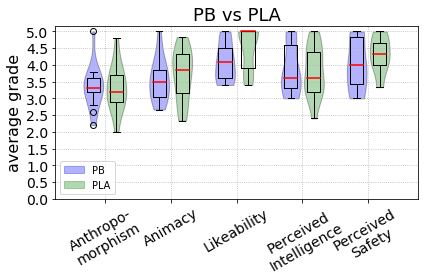

In [76]:
xtick_label = ['Anthropo-\nmorphism', 'Animacy', 'Likeability', 'Perceived\nIntelligence', 'Perceived\nSafety']
plt.figure()

plt.plot()
medianprops = dict(linestyle='-', linewidth=1.5, color='red')
# PB
PB_violin_plot = plt.violinplot(avg_PB.values[:,0:5], positions = np.arange(1.15,10.1,2), widths=0.6, showextrema=False)
for pc in PB_violin_plot['bodies']:
    pc.set_facecolor('blue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PB_box_plot = plt.boxplot(avg_PB.values[:,0:5], positions = np.arange(1.15,10.1,2), widths=0.4, medianprops=medianprops)

# PLA
PLA_violin_plot = plt.violinplot(avg_PLA.values[:,0:5], positions = np.arange(1.85,10.1,2), widths=0.6, showextrema=False)
for pc in PLA_violin_plot['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PLA_box_plot = plt.boxplot(avg_PLA.values[:,0:5], positions = np.arange(1.85,10.1,2), widths=0.4, medianprops=medianprops)

plt.xlim((0,11))
plt.xticks(np.arange(1.5,10.1,2), xtick_label, rotation=30, fontsize=14)

plt.yticks(np.arange(0,5.1,0.5), fontsize=14)
plt.ylabel('average grade', fontsize=16)
plt.title('PB vs PLA', fontsize=18)

# customize legend
PB_legend_patch = Patch(color='blue', label='PB', alpha=0.3)
PLA_legend_patch = Patch(color='green', label='PLA', alpha=0.3)
plt.legend(handles=[PB_legend_patch, PLA_legend_patch])

plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/boxplot_and_violinplot_average_grade_for_each_godspeed_category_PB_PLA.png',dpi=300)

### SARA vs ACRA

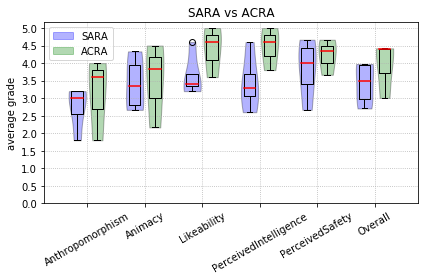

In [77]:
xtick_label = ['Anthropomorphism', 'Animacy', 'Likeability', 'PerceivedIntelligence', 'PerceivedSafety', 'Overall']
plt.figure()

plt.plot()
medianprops = dict(linestyle='-', linewidth=1.5, color='red')
# SARA
PB_violin_plot = plt.violinplot(avg_SARA.values[:,0:6], positions = np.arange(1.15,12.1,2), widths=0.6, showextrema=False)
for pc in PB_violin_plot['bodies']:
    pc.set_facecolor('blue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PB_box_plot = plt.boxplot(avg_SARA.values[:,0:6], positions = np.arange(1.15,12.1,2), widths=0.4, medianprops=medianprops)

# ACRA
PLA_violin_plot = plt.violinplot(avg_ACRA.values[:,0:6], positions = np.arange(1.85,12.1,2), widths=0.6, showextrema=False)
for pc in PLA_violin_plot['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PLA_box_plot = plt.boxplot(avg_ACRA.values[:,0:6], positions = np.arange(1.85,12.1,2), widths=0.4, medianprops=medianprops)

plt.xlim((0,13))
plt.xticks(np.arange(1.5,12.1,2), xtick_label, rotation=30)

plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('average grade')
plt.title('SARA vs ACRA')

# customize legend
PB_legend_patch = Patch(color='blue', label='SARA', alpha=0.3)
PLA_legend_patch = Patch(color='green', label='ACRA', alpha=0.3)
plt.legend(handles=[PB_legend_patch, PLA_legend_patch])

plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/boxplot_and_violinplot_average_grade_for_each_godspeed_category_SARA_ACRA.png',dpi=300)

### PB-PLA vs SARA-ACRA

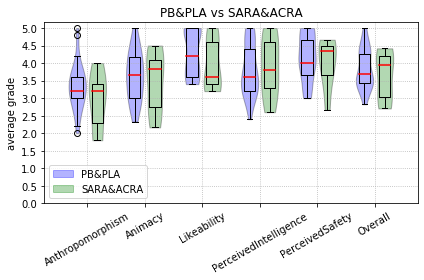

In [78]:
avg_PB_PLA = pd.concat([avg_PB, avg_PLA])
avg_SARA_ACRA = pd.concat([avg_SARA, avg_ACRA])

xtick_label = ['Anthropomorphism', 'Animacy', 'Likeability', 'PerceivedIntelligence', 'PerceivedSafety', 'Overall']
plt.figure()

plt.plot()
medianprops = dict(linestyle='-', linewidth=1.5, color='red')
# SARA
PB_violin_plot = plt.violinplot(avg_PB_PLA.values[:,0:6], positions = np.arange(1.15,12.1,2), widths=0.6, showextrema=False)
for pc in PB_violin_plot['bodies']:
    pc.set_facecolor('blue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PB_box_plot = plt.boxplot(avg_PB_PLA.values[:,0:6], positions = np.arange(1.15,12.1,2), widths=0.4, medianprops=medianprops)

# ACRA
PLA_violin_plot = plt.violinplot(avg_SARA_ACRA.values[:,0:6], positions = np.arange(1.85,12.1,2), widths=0.6, showextrema=False)
for pc in PLA_violin_plot['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
PLA_box_plot = plt.boxplot(avg_SARA_ACRA.values[:,0:6], positions = np.arange(1.85,12.1,2), widths=0.4, medianprops=medianprops)

plt.xlim((0,13))
plt.xticks(np.arange(1.5,12.1,2), xtick_label, rotation=30)

plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('average grade')
plt.title('PB&PLA vs SARA&ACRA')

# customize legend
PB_legend_patch = Patch(color='blue', label='PB&PLA', alpha=0.3)
PLA_legend_patch = Patch(color='green', label='SARA&ACRA', alpha=0.3)
plt.legend(handles=[PB_legend_patch, PLA_legend_patch])

plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/boxplot_and_violinplot_average_grade_for_each_godspeed_category_SARA_ACRA.png',dpi=300)


### CronbachAlpha

In [79]:
anthropomorphism_column_name = Prescribed_Behavior.columns[5:10]
animacy_column_name = Prescribed_Behavior.columns[10:16]
likeability_column_name = Prescribed_Behavior.columns[16:21]
perceived_intelligence_column_name = Prescribed_Behavior.columns[21:26]
perceived_safety_column_name = Prescribed_Behavior.columns[26:29]

PB_anthropomorphism = Prescribed_Behavior[anthropomorphism_column_name].dropna().values
PB_animacy = Prescribed_Behavior[animacy_column_name].values
PB_likeability = Prescribed_Behavior[likeability_column_name].values
PB_perceived_intelligence = Prescribed_Behavior[perceived_intelligence_column_name].values
PB_perceived_safety = Prescribed_Behavior[perceived_safety_column_name].values

PLA_anthropomorphism = Parameterized_Learning_Agent[anthropomorphism_column_name].values
PLA_animacy = Parameterized_Learning_Agent[animacy_column_name].values
PLA_likeability = Parameterized_Learning_Agent[likeability_column_name].values
PLA_perceived_intelligence = Parameterized_Learning_Agent[perceived_intelligence_column_name].values
PLA_perceived_safety = Parameterized_Learning_Agent[perceived_safety_column_name].values

SARA_anthropomorphism = Single_Agent_Raw_Act[anthropomorphism_column_name].values
SARA_animacy = Single_Agent_Raw_Act[animacy_column_name].values
SARA_likeability = Single_Agent_Raw_Act[likeability_column_name].values
SARA_perceived_intelligence = Single_Agent_Raw_Act[perceived_intelligence_column_name].values
SARA_perceived_safety = Single_Agent_Raw_Act[perceived_safety_column_name].values

ACRA_anthropomorphism = Agent_Community_Raw_Act[anthropomorphism_column_name].values
ACRA_animacy = Agent_Community_Raw_Act[animacy_column_name].values
ACRA_likeability = Agent_Community_Raw_Act[likeability_column_name].values
ACRA_perceived_intelligence = Agent_Community_Raw_Act[perceived_intelligence_column_name].values
ACRA_perceived_safety = Agent_Community_Raw_Act[perceived_safety_column_name].values
    

In [80]:
Prescribed_Behavior.shape

(14, 31)

In [81]:
Parameterized_Learning_Agent.shape

(15, 31)

In [82]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [83]:
category_name = ['Anthropomorphism', 'Animacy', 'Likeability', 'Perceived Intelligence',
                 'Perceived Safety']
PB_GoodSpeed = [PB_anthropomorphism, PB_animacy, PB_likeability, PB_perceived_intelligence, PB_perceived_safety]
PLA_GoodSpeed = [PLA_anthropomorphism, PLA_animacy, PLA_likeability, PLA_perceived_intelligence, PLA_perceived_safety]
SARA_GoodSpeed = [SARA_anthropomorphism, SARA_animacy, SARA_likeability, SARA_perceived_intelligence, SARA_perceived_safety]
ACRA_GoodSpeed = [ACRA_anthropomorphism, ACRA_animacy, ACRA_likeability, ACRA_perceived_intelligence, ACRA_perceived_safety]

print('PB:')
for cat_i, category in enumerate(PB_GoodSpeed):
    print('\t{:25s}: alpha={:.2f}'.format(category_name[cat_i], CronbachAlpha(category)))

print('PLA:')
for cat_i, category in enumerate(PLA_GoodSpeed):
    print('\t{:25s}: alpha={:.2f}'.format(category_name[cat_i], CronbachAlpha(category)))
    
print('SARA:')
for cat_i, category in enumerate(SARA_GoodSpeed):
    print('\t{:25s}: alpha={:.2f}'.format(category_name[cat_i], CronbachAlpha(category)))
    
print('ACRA:')
for cat_i, category in enumerate(ACRA_GoodSpeed):
    print('\t{:25s}: alpha={:.2f}'.format(category_name[cat_i], CronbachAlpha(category)))

PB:
	Anthropomorphism         : alpha=0.74
	Animacy                  : alpha=0.77
	Likeability              : alpha=0.85
	Perceived Intelligence   : alpha=0.89
	Perceived Safety         : alpha=0.52
PLA:
	Anthropomorphism         : alpha=0.64
	Animacy                  : alpha=0.80
	Likeability              : alpha=0.93
	Perceived Intelligence   : alpha=0.85
	Perceived Safety         : alpha=0.27
SARA:
	Anthropomorphism         : alpha=0.78
	Animacy                  : alpha=0.75
	Likeability              : alpha=0.87
	Perceived Intelligence   : alpha=0.91
	Perceived Safety         : alpha=0.68
ACRA:
	Anthropomorphism         : alpha=0.89
	Animacy                  : alpha=0.95
	Likeability              : alpha=0.93
	Perceived Intelligence   : alpha=0.89
	Perceived Safety         : alpha=0.64


### T-Test: 
Average Score for Each Godspeed Category

Refrences:
* https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html



Because the one-sided tests can be backed out from the two-sided tests. (With symmetric distributions one-sided p-value is just half of the two-sided pvalue)
It goes on to say that scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test when p/2 < alpha and t < 0.

* https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy

c:\programdata\anaconda3\envs\app_cloud\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


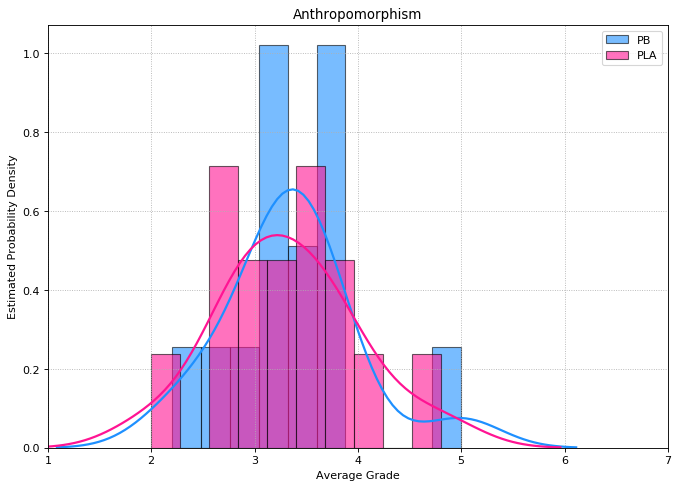

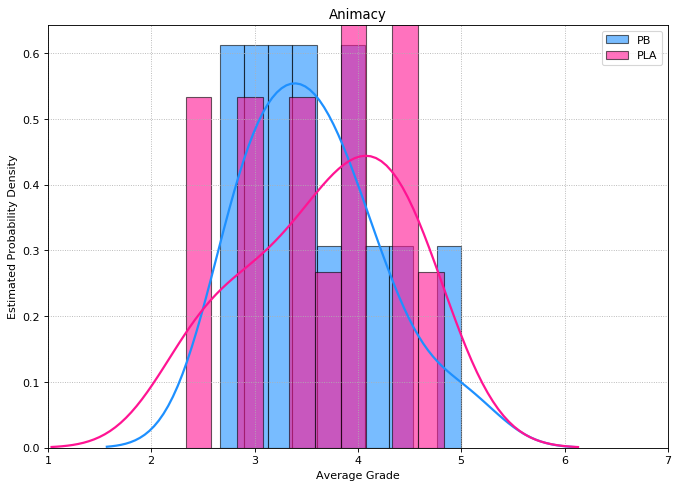

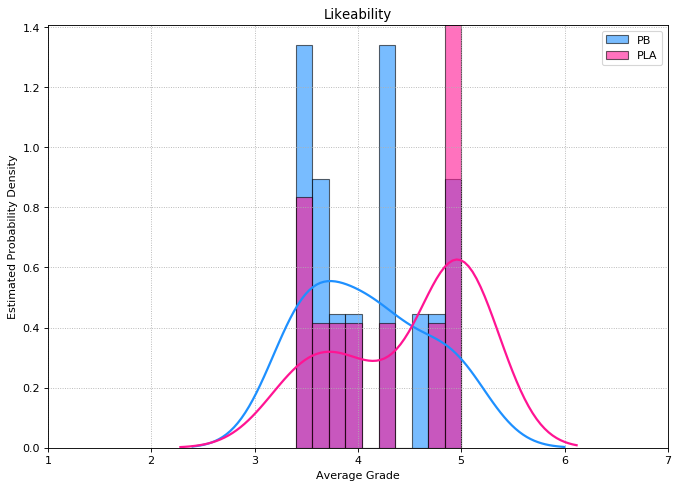

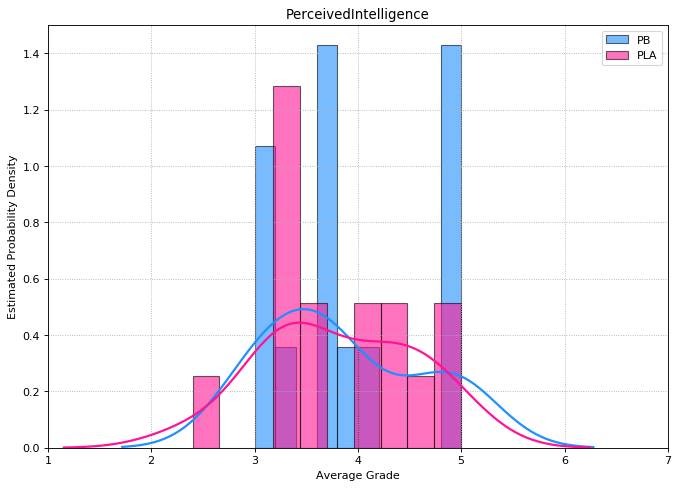

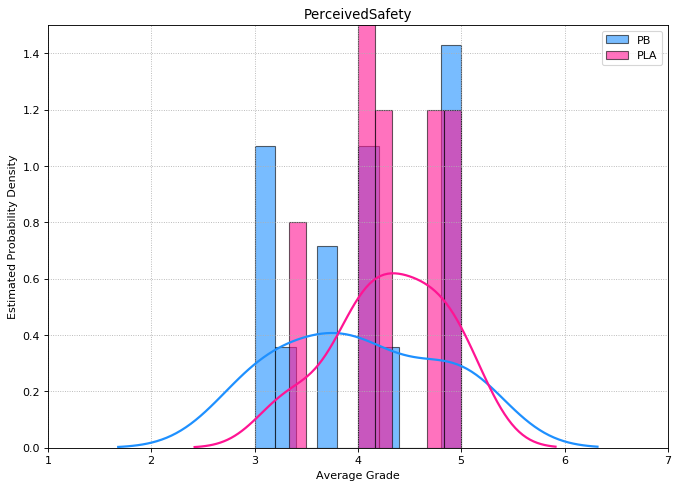

In [84]:
import seaborn as sns
# Plot
def plot_histogram(category='Likeability'):
    kwargs = dict(hist_kws={'alpha':.6, 'edgecolor':"k"}, kde_kws={'linewidth':2})

    plt.figure(figsize=(10,7), dpi= 80)
    bins = 10
    sns.distplot(avg_PB[category], bins=bins, color="dodgerblue", label="PB", **kwargs)
    sns.distplot(avg_PLA[category], bins=bins, color="deeppink", label="PLA", **kwargs)
    plt.xlim(1,7)
    plt.xlabel('Average Grade')
    plt.ylabel('Estimated Probability Density')
    plt.title(category)
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.savefig('./figures/histogram_{}_PB_vs_PLA.png'.format(category), dpi=150)

plot_histogram(category='Anthropomorphism')
plot_histogram(category='Animacy')
plot_histogram(category='Likeability')
plot_histogram(category='PerceivedIntelligence')
plot_histogram(category='PerceivedSafety')

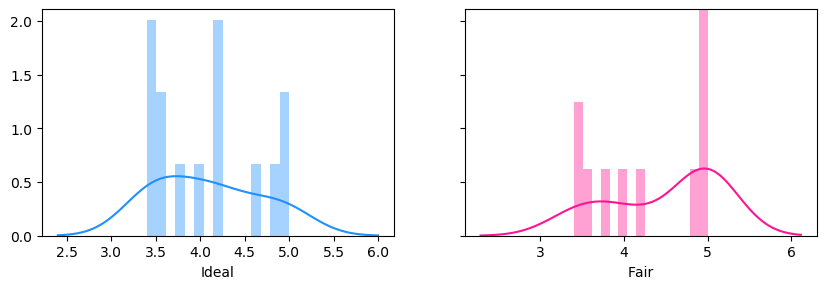

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True, dpi=100)
bins = 15
sns.distplot(avg_PB['Likeability'] , bins=bins, color="dodgerblue", ax=axes[0], axlabel='Ideal')
sns.distplot(avg_PLA['Likeability'] , bins=bins, color="deeppink", ax=axes[1], axlabel='Fair')

In [86]:
avg_PB['Likeability']

0     3.8
1     4.0
2     5.0
3     3.4
4     4.8
5     3.6
6     4.2
7     3.4
8     3.4
9     5.0
10    4.2
11    3.6
12    4.2
13    4.6
Name: Likeability, dtype: float64

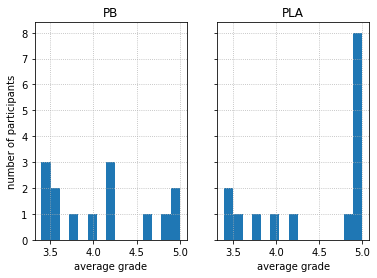

In [87]:
avg_PB['Likeability']
fig, axes = plt.subplots(1,2, sharey=True)
bins=15
axes[0].hist(avg_PB['Likeability'], bins=bins)
axes[0].set_title('PB')
axes[1].hist(avg_PLA['Likeability'], bins=bins)
axes[1].set_title('PLA')
axes[0].set_xlabel('average grade')
axes[1].set_xlabel('average grade')
axes[0].set_ylabel('number of participants')
axes[0].grid(True, linestyle=':')
axes[1].grid(True, linestyle=':')
fig.savefig('', dpi=150)

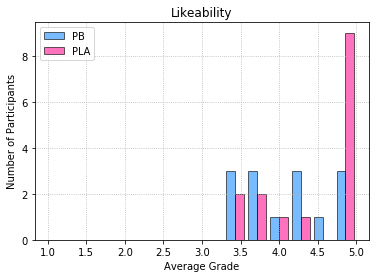

In [88]:
avg_PB['Likeability']
fig, axes = plt.subplots(1,1, sharey=True)
bins=15
bins = np.linspace(1, 5, 15)
axes.hist([avg_PB['Likeability'], avg_PLA['Likeability']], bins=bins, label=['PB','PLA'], color=['dodgerblue','deeppink'], 
          alpha=0.6, edgecolor='black')
axes.set_title('Likeability')
# axes.hist(avg_PLA['Likeability'], bins=bins, label='PLA')
axes.set_xlabel('Average Grade')
axes.set_ylabel('Number of Participants')
plt.legend()
axes.grid(True, linestyle=':')
fig.savefig('./figures/histogram_likeability_PB_vs_PLA.png', dpi=150)


In [100]:
avg_PB['Likeability'].values

array([3.8, 4. , 5. , 3.4, 4.8, 3.6, 4.2, 3.4, 3.4, 5. , 4.2, 3.6, 4.2,
       4.6])

In [101]:
avg_PLA['Likeability'].values

array([4.2, 3.4, 5. , 5. , 5. , 3.6, 5. , 5. , 5. , 3.8, 5. , 3.4, 4.8,
       4. , 5. ])

In [104]:
stats.mannwhitneyu(avg_PB['Likeability'],avg_PLA['Likeability'], alternative='two-sided')

MannwhitneyuResult(statistic=67.0, pvalue=0.09316498486250958)

In [106]:
a, b = stats.mannwhitneyu(avg_PB['Likeability'],avg_PLA['Likeability'], alternative='less')

In [114]:
np.median(a)

0.0

In [116]:
for column in avg_PB.columns:
    a = avg_PB[column]
    b = avg_PLA[column]
    t2, p2 = stats.ttest_ind(a,b)
    print(column)
    print("\tt = {:.4f}, p = {:.4f}".format(t2, p2/2))
    
    u, p = stats.mannwhitneyu(a,b)
    print("\tu = {:.4f}, p = {:.4f}".format(u, p))
    
    print("\tStatistics:")
    print("\t\tPB: Mean={:.4f}, SD={:.4f}, Median={:.4f}".format(np.mean(a), np.std(a), np.median(a)))
    print("\t\tPLA: Mean={:.4f}, SD={:.4f}, Median={:.4f}".format(np.mean(b), np.std(b), np.median(b)))
    
    # normality test
    print('\tD’Agostino and Pearson’s Test')
    statistic_PB, pvalue_PB = stats.normaltest(avg_PB[column])
    statistic_PLA, pvalue_PLA = stats.normaltest(avg_PLA[column])
    print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
    print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))
    
    statistic_PB, pvalue_PB = stats.shapiro(avg_PB[column])
    statistic_PLA, pvalue_PLA = stats.shapiro(avg_PLA[column])
    print('\tShapiro-Wilk Test')
    print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
    print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))
    
    
    
#     plt.figure()
#     plt.scatter(np.arange(len(a)),a)
#     plt.scatter(np.arange(len(b)),b)
#     plt.legend(['PB','PLA'])
#     plt.title(column)

Anthropomorphism
	t = 0.1489, p = 0.4414
	u = 100.5000, p = 0.4302
	Statistics:
		PB: Mean=3.3571, SD=0.6287, Median=3.3000
		PLA: Mean=3.3200, SD=0.6645, Median=3.2000
	D’Agostino and Pearson’s Test
		PB Normality: statistic=5.317219502448431, pvalue=0.07004553480331067
		PLA Normality: statistic=0.884291205200209, pvalue=0.6426560562502459
	Shapiro-Wilk Test
		PB Normality: statistic=0.9189740419387817, pvalue=0.21254147589206696
		PLA Normality: statistic=0.9825076460838318, pvalue=0.9837616682052612
Animacy
	t = -0.5315, p = 0.2997
	u = 88.5000, p = 0.2419
	Statistics:
		PB: Mean=3.5595, SD=0.6192, Median=3.5000
		PLA: Mean=3.7000, SD=0.7434, Median=3.8333
	D’Agostino and Pearson’s Test
		PB Normality: statistic=1.9852055106928366, pvalue=0.37061082530422224
		PLA Normality: statistic=1.2665760686524257, pvalue=0.5308434967007136
	Shapiro-Wilk Test
		PB Normality: statistic=0.9574677348136902, pvalue=0.6812569499015808
		PLA Normality: statistic=0.9517762660980225, pvalue=0.5528504

In [90]:
for column in avg_SARA.columns:
    a = avg_SARA[column]
    b = avg_ACRA[column]
    t2, p2 = stats.ttest_ind(a,b)
    print(column)
    print("t = {:.4f}, p = {:.4f}".format(t2, p2))
#     plt.figure()
#     plt.scatter(np.arange(len(a)),a)
#     plt.scatter(np.arange(len(b)),b)
#     plt.legend(['PB','PLA'])
#     plt.title(column)

Anthropomorphism
t = -0.5572, p = 0.6014
Animacy
t = -0.1113, p = 0.9157
Likeability
t = -1.4574, p = 0.2048
PerceivedIntelligence
t = -1.7611, p = 0.1385
PerceivedSafety
t = -0.6742, p = 0.5301
Overall_Avg
t = -0.9645, p = 0.3791
Behavior
t = -inf, p = 0.0000


# Method 3: Proportion  z-test  on  Number  of  Participants  RatedGrade>=Threshold
**Count the number of participant who rated grade>=Threshold**

In [91]:
def get_num_of_participants_whose_grade_greater_than_x(data, threshold=3):
    proportion = np.zeros(24)
    participant_count = np.zeros(24)
    question_name = []
    
    columns = data.columns
    for i in range(24):
        # get question name
        q1, q5 = columns[i+5].split('1. ')[1].split(' 5. ')
        q5 = q5.split(')')[0]
        question = '{}-{}'.format(q1, q5)
        question_name.append(question)
        
        for participant in data[columns[i+5]]:
            if not np.isnan(participant): 
                participant_count[i] += 1
                if participant>=threshold:
                    proportion[i] += 1
        #print('participant_count: {}'.format(participant_count))
        proportion[i] = proportion[i] / participant_count[i]
    return proportion, participant_count, question_name
    

In [92]:
threshold=5#4#5
proportion_PB, participant_count_PB, question_PB = get_num_of_participants_whose_grade_greater_than_x(Prescribed_Behavior, threshold)
proportion_PLA, participant_count_PLA, question_PLA = get_num_of_participants_whose_grade_greater_than_x(Parameterized_Learning_Agent, threshold)

In [93]:
question_PB[4] = 'Moving rigidly-elegantly'

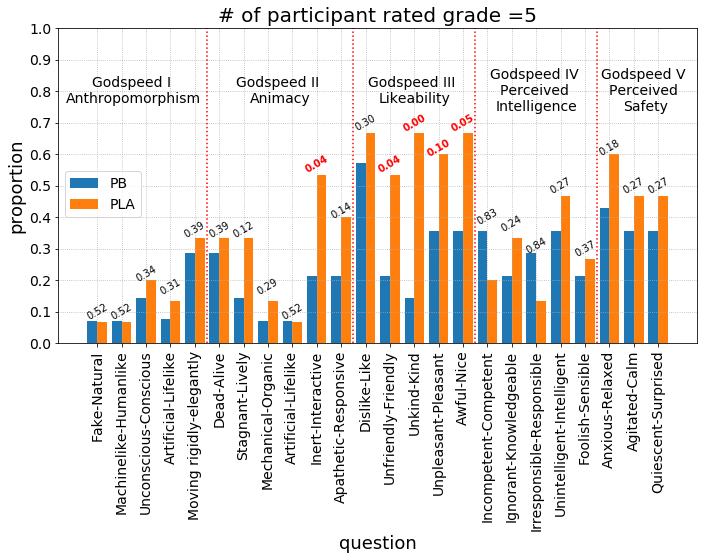

In [94]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10,8))
bar_width = 0.4
plt.bar(np.arange(24)-bar_width/2, proportion_PB, width=bar_width)
plt.bar(np.arange(24)+bar_width/2, proportion_PLA, width=bar_width)
plt.title('# of participant rated grade ={}'.format(threshold), fontsize=20)
plt.xticks(np.arange(24), question_PB, rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('question', fontsize=18)
plt.ylabel('proportion', fontsize=18)
plt.legend(['PB', 'PLA'], loc=[0.01, 0.4])

# add vertical line
vertial_lines = [4.5, 10.5, 15.5, 20.5]
for v in vertial_lines:
    plt.axvline(x=v, linestyle=':', color='r')
    
# add category text
category_text = ['Godspeed I \nAnthropomorphism','Godspeed II \nAnimacy','Godspeed III \nLikeability','Godspeed IV \nPerceived \nIntelligence','Godspeed V \nPerceived \nSafety']
loc_x = [1.5, 7.5, 13, 18, 22.5]
loc_y = 0.8
for i in range(5):
    plt.text(loc_x[i], loc_y, category_text[i], horizontalalignment='center',verticalalignment='center')

# add proportion-z test p value
proportion_z_test_p = ['0.52', '0.52', '0.34', '0.31', '0.39', 
                       '0.39', '0.12', '0.29', '0.52', '0.04', '0.14',
                       '0.30', '0.04', '0.00', '0.10', '0.05', 
                       '0.83', '0.24', '0.84', '0.27', '0.37', 
                       '0.18', '0.27', '0.27']
loc_x_z_test = np.arange(0,24,1)
loc_y_z_test = [0.1 , 0.1 , 0.22, 0.18, 0.36,
                0.36, 0.36, 0.18, 0.1 , 0.57, 0.42, 
                0.7,  0.57, 0.7,  0.62, 0.7, 
                0.4,  0.38, 0.31, 0.5,  0.3, 
                0.62, 0.5, 0.5 ]
for j in range(24):
    if j in [9, 12, 13, 14, 15]:
        color = 'red'
        fontweight = 'bold'
    else:
        color = 'black'
        fontweight = 'regular'
    plt.text(loc_x_z_test[j], loc_y_z_test[j], proportion_z_test_p[j], 
             horizontalalignment='center',verticalalignment='center', 
             fontsize = 10, rotation=30, color=color, fontweight=fontweight)
    
plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/proportion_test_num_participant_greater_than_threshold_{}.png'.format(threshold), dpi=300)

In [95]:
len(PB_greater_than_3)

NameError: name 'PB_greater_than_3' is not defined

In [ ]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10,8))
bar_width = 0.4
plt.bar(np.arange(24)-bar_width/2, PB_greater_than_3, width=bar_width)
plt.bar(np.arange(24)+bar_width/2, PLA_greater_than_3, width=bar_width)

In [ ]:
PLA_greater_than_3
PB_greater_than_3

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10,8))
bar_width = 0.4
plt.bar(np.arange(24)-bar_width/2, PB_greater_than_3, width=bar_width)
plt.bar(np.arange(24)+bar_width/2, PLA_greater_than_3, width=bar_width)
plt.title('proportion of participant rated grade >= 3', fontsize=20)
plt.xticks(np.arange(24), question_PB, rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('question', fontsize=18)
plt.ylabel('proportion', fontsize=18)
plt.legend(['PB', 'PLA'], loc=[0.01, 0.4])

# add vertical line
vertial_lines = [4.5, 10.5, 15.5, 20.5]
for v in vertial_lines:
    plt.axvline(x=v, linestyle=':', color='r')
    
# add category text
category_text = ['Godspeed I \nAnthropomorphism','Godspeed II \nAnimacy','Godspeed III \nLikeability','Godspeed IV \nPerceived \nIntelligence','Godspeed V \nPerceived \nSafety']
loc_x = [1.5, 7.5, 13, 18, 22.5]
loc_y = 1.2
for i in range(5):
    plt.text(loc_x[i], loc_y, category_text[i], horizontalalignment='center',verticalalignment='center')

plt.ylim(0,1.4)
plt.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('./figures/proportion_test_num_participant_greater_than_threshold_{}.png'.format(3), dpi=300)

## Proportion Test
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
for i in range(24):
    counts = np.array([proportion_PB[i]*participant_count_PB[i], proportion_PLA[i]*participant_count_PLA[i]])
    nobs = np.array([participant_count_PB[i], participant_count_PLA[i]])
    stat, pval = proportions_ztest(counts, nobs, alternative='smaller')
    print('{}'.format(question_PB[i]))
    #print('stat={:.4f}, pval={:.4f}'.format(stat, pval))
    print('pval={:.4f}'.format(pval))

## Pie Chart within 24 questions PLA  vs PB

In [96]:
pla_greater_than_pb_count = 0
pla_equal_to_pb_count = 0
pla_less_than_pb_count = 0
for i in range(len(proportion_PLA)):
    if proportion_PB[i] < proportion_PLA[i]:
        pla_greater_than_pb_count += 1
    elif proportion_PB[i] == proportion_PLA[i]:
        pla_equal_to_pb_count += 1
    else:
        pla_less_than_pb_count += 1

Text(0.5, 1.0, 'PB vs PLA')

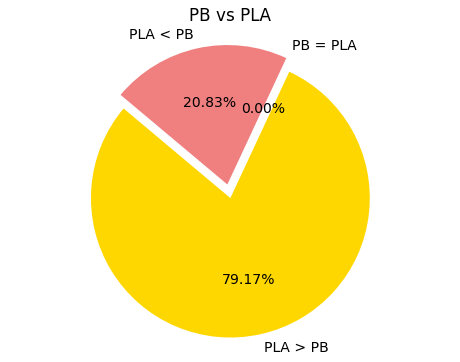

In [97]:
# Plot
plt.figure(figsize=(8,6))
# PLA vs PB
plt.plot()
labels = 'PLA > PB', 'PB = PLA', 'PLA < PB'
sizes = [pla_greater_than_pb_count, pla_equal_to_pb_count, pla_less_than_pb_count]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('PB vs PLA')